In [18]:
from recommender import Recommender
import pandas as pd
import numpy as np
from scoring import *
import graphlab
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_train = pd.read_csv('jester_train.csv')
df_test = pd.read_csv('jester_test.csv')

In [5]:
df_train.head()

,user_id,joke_id,rating
0,7302,29,7.156
1,61815,46,6.375
2,31128,96,2.281
3,36125,147,-1.781
4,18007,60,2.188


In [6]:
sf_train = graphlab.SFrame(df_train[['user_id', 'joke_id', 'rating']])
sf_train

This non-commercial license of GraphLab Create for academic use is assigned to yanmi617@gmail.com and will expire on September 18, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1494875611.log


user_id,joke_id,rating
7302,29,7.156
61815,46,6.375
31128,96,2.281
36125,147,-1.781
18007,60,2.188
7387,99,3.594
12007,18,-2.094
30302,105,5.406
46742,8,1.562
26187,125,1.312


(array([  61126.,   51836.,   64556.,   73284.,   85347.,  143491.,
         153289.,  133086.,  108448.,  125537.]),
 array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 <a list of 10 Patch objects>)

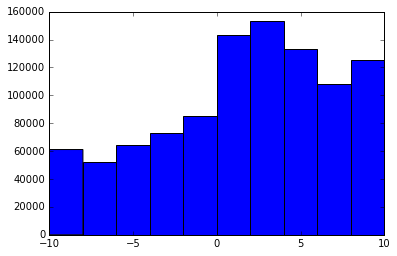

In [19]:
plt.hist(df_train['rating'].values)

## ALS (Alternating Least Squares)

In [61]:
rec_als = graphlab.recommender.factorization_recommender.create(
                sf_train,
                user_id='user_id',
                item_id='joke_id',
                target='rating',
                solver='als',
                max_iterations=300,
                num_factors=20,
                side_data_factorization=False)

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1000000 observations with 58125 users and 140 items.

Data prepared in: 1.38414s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 20       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 300      |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 94us         | NA                     |

+---------+--------------+------------------------+

| 0       | 1.39s        | 3.54647                |

| 1       | 2.69s        | 2.22387                |

| 2       | 4.05s        | 2.19023                |

| 3       | 5.72s        | 2.1669                 |

| 4       | 7.24s        | 2.14872                |

| 5       | 8.62s        | 2.13385                |

| 6       | 9.91s        | 2.12135                |

| 7       | 11.20s       | 2.11078                |

| 8       | 12.48s       | 2.10174                |

| 9       | 13.76s       | 2.09386                |

| 10      | 15.02s       | 2.0869                 |

| 11      | 16.29s       | 2.08074                |

| 12      | 17.55s       | 2.07521                |

| 13      | 18.82s       | 2.07022                |

| 14      | 20.11s       | 2.06571                |

| 15      | 21.35s       | 2.06162                |

| 16      | 22.63s       | 2.05793                |

| 17      | 23.89s       | 2.05456                |

| 18      | 25.16s       | 2.05147                |

| 19      | 26.44s       | 2.04861                |

| 20      | 27.72s       | 2.04595                |

| 21      | 28.99s       | 2.04345                |

| 22      | 30.28s       | 2.04112                |

| 23      | 31.56s       | 2.03894                |

| 24      | 32.87s       | 2.03689                |

| 25      | 34.16s       | 2.03497                |

| 26      | 35.42s       | 2.03319                |

| 27      | 36.68s       | 2.03153                |

| 28      | 37.95s       | 2.02997                |

| 29      | 39.23s       | 2.0285                 |

| 30      | 40.49s       | 2.02711                |

| 31      | 41.76s       | 2.02579                |

| 32      | 43.03s       | 2.02454                |

| 33      | 44.35s       | 2.02334                |

| 34      | 45.66s       | 2.0222                 |

| 35      | 46.93s       | 2.0211                 |

| 36      | 48.24s       | 2.02005                |

| 37      | 49.53s       | 2.01904                |

| 38      | 50.80s       | 2.01806                |

| 39      | 52.07s       | 2.01713                |

| 40      | 53.33s       | 2.01623                |

| 41      | 54.59s       | 2.01537                |

| 42      | 55.84s       | 2.01454                |

| 43      | 57.11s       | 2.01375                |

| 44      | 58.39s       | 2.013                  |

| 45      | 59.66s       | 2.01228                |

| 46      | 1m 0s        | 2.01159                |

| 47      | 1m 2s        | 2.01093                |

| 48      | 1m 3s        | 2.0103                 |

| 49      | 1m 4s        | 2.00969                |

| 50      | 1m 5s        | 2.00911                |

| 51      | 1m 7s        | 2.00855                |

| 52      | 1m 8s        | 2.00801                |

| 53      | 1m 9s        | 2.00749                |

| 54      | 1m 11s       | 2.00699                |

| 55      | 1m 12s       | 2.00651                |

| 56      | 1m 13s       | 2.00604                |

| 57      | 1m 14s       | 2.00558                |

| 58      | 1m 16s       | 2.00514                |

| 59      | 1m 17s       | 2.00471                |

| 60      | 1m 18s       | 2.00428                |

| 61      | 1m 20s       | 2.00387                |

| 62      | 1m 21s       | 2.00346                |

| 63      | 1m 23s       | 2.00306                |

| 64      | 1m 24s       | 2.00267                |

| 65      | 1m 26s       | 2.00229                |

| 66      | 1m 28s       | 2.00192                |

| 67      | 1m 29s       | 2.00155                |

| 68      | 1m 31s       | 2.00119                |

| 69      | 1m 33s       | 2.00084                |

| 70      | 1m 34s       | 2.0005                 |

| 71      | 1m 36s       | 2.00018                |

| 72      | 1m 37s       | 1.99986                |

| 73      | 1m 38s       | 1.99955                |

| 74      | 1m 40s       | 1.99925                |

| 75      | 1m 41s       | 1.99895                |

| 76      | 1m 42s       | 1.99867                |

| 77      | 1m 43s       | 1.9984                 |

| 78      | 1m 45s       | 1.99813                |

| 79      | 1m 46s       | 1.99787                |

| 80      | 1m 47s       | 1.99762                |

| 81      | 1m 49s       | 1.99737                |

| 82      | 1m 50s       | 1.99713                |

| 83      | 1m 51s       | 1.99689                |

| 84      | 1m 52s       | 1.99666                |

| 85      | 1m 54s       | 1.99644                |

| 86      | 1m 55s       | 1.99622                |

| 87      | 1m 56s       | 1.99601                |

| 88      | 1m 57s       | 1.9958                 |

| 89      | 1m 59s       | 1.9956                 |

| 90      | 2m 0s        | 1.99539                |

| 91      | 2m 1s        | 1.99519                |

| 92      | 2m 3s        | 1.995                  |

| 93      | 2m 4s        | 1.99481                |

| 94      | 2m 5s        | 1.99462                |

| 95      | 2m 7s        | 1.99443                |

| 96      | 2m 8s        | 1.99425                |

| 97      | 2m 9s        | 1.99407                |

| 98      | 2m 11s       | 1.99389                |

| 99      | 2m 12s       | 1.99371                |

| 100     | 2m 13s       | 1.99354                |

| 101     | 2m 15s       | 1.99337                |

| 102     | 2m 16s       | 1.99321                |

| 103     | 2m 17s       | 1.99304                |

| 104     | 2m 19s       | 1.99288                |

| 105     | 2m 20s       | 1.99272                |

| 106     | 2m 21s       | 1.99256                |

| 107     | 2m 23s       | 1.9924                 |

| 108     | 2m 24s       | 1.99225                |

| 109     | 2m 25s       | 1.9921                 |

| 110     | 2m 27s       | 1.99194                |

| 111     | 2m 28s       | 1.99179                |

| 112     | 2m 30s       | 1.99164                |

| 113     | 2m 31s       | 1.99148                |

| 114     | 2m 32s       | 1.99133                |

| 115     | 2m 34s       | 1.99118                |

| 116     | 2m 35s       | 1.99103                |

| 117     | 2m 36s       | 1.99088                |

| 118     | 2m 38s       | 1.99073                |

| 119     | 2m 39s       | 1.99058                |

| 120     | 2m 41s       | 1.99043                |

| 121     | 2m 42s       | 1.99028                |

| 122     | 2m 44s       | 1.99014                |

| 123     | 2m 45s       | 1.98999                |

| 124     | 2m 46s       | 1.98985                |

| 125     | 2m 48s       | 1.9897                 |

| 126     | 2m 49s       | 1.98956                |

| 127     | 2m 51s       | 1.98942                |

| 128     | 2m 52s       | 1.98928                |

| 129     | 2m 53s       | 1.98913                |

| 130     | 2m 55s       | 1.98899                |

| 131     | 2m 56s       | 1.98884                |

| 132     | 2m 58s       | 1.98869                |

| 133     | 2m 59s       | 1.98854                |

| 134     | 3m 1s        | 1.98841                |

| 135     | 3m 2s        | 1.98827                |

| 136     | 3m 4s        | 1.98814                |

| 137     | 3m 5s        | 1.98801                |

| 138     | 3m 6s        | 1.98789                |

| 139     | 3m 8s        | 1.98776                |

| 140     | 3m 9s        | 1.98764                |

| 141     | 3m 11s       | 1.98752                |

| 142     | 3m 12s       | 1.9874                 |

| 143     | 3m 14s       | 1.98729                |

| 144     | 3m 15s       | 1.98717                |

| 145     | 3m 16s       | 1.98706                |

| 146     | 3m 18s       | 1.98695                |

| 147     | 3m 20s       | 1.98684                |

| 148     | 3m 22s       | 1.98673                |

| 149     | 3m 23s       | 1.98662                |

| 150     | 3m 25s       | 1.98651                |

| 151     | 3m 27s       | 1.9864                 |

| 152     | 3m 28s       | 1.98629                |

| 153     | 3m 30s       | 1.98619                |

| 154     | 3m 31s       | 1.98608                |

| 155     | 3m 33s       | 1.98598                |

| 156     | 3m 34s       | 1.98588                |

| 157     | 3m 36s       | 1.98578                |

| 158     | 3m 37s       | 1.98568                |

| 159     | 3m 39s       | 1.98558                |

| 160     | 3m 41s       | 1.98548                |

| 161     | 3m 42s       | 1.98538                |

| 162     | 3m 44s       | 1.98529                |

| 163     | 3m 45s       | 1.9852                 |

| 164     | 3m 47s       | 1.9851                 |

| 165     | 3m 48s       | 1.98501                |

| 166     | 3m 50s       | 1.98492                |

| 167     | 3m 51s       | 1.98483                |

| 168     | 3m 53s       | 1.98474                |

| 169     | 3m 54s       | 1.98466                |

| 170     | 3m 56s       | 1.98457                |

| 171     | 3m 57s       | 1.98448                |

| 172     | 3m 58s       | 1.9844                 |

| 173     | 4m 0s        | 1.98432                |

| 174     | 4m 2s        | 1.98423                |

| 175     | 4m 3s        | 1.98415                |

| 176     | 4m 5s        | 1.98407                |

| 177     | 4m 6s        | 1.98399                |

| 178     | 4m 8s        | 1.9839                 |

| 179     | 4m 9s        | 1.98382                |

| 180     | 4m 11s       | 1.98374                |

| 181     | 4m 12s       | 1.98366                |

| 182     | 4m 14s       | 1.98358                |

| 183     | 4m 15s       | 1.98351                |

| 184     | 4m 17s       | 1.98343                |

| 185     | 4m 18s       | 1.98335                |

| 186     | 4m 19s       | 1.98328                |

| 187     | 4m 21s       | 1.9832                 |

| 188     | 4m 22s       | 1.98313                |

| 189     | 4m 24s       | 1.98305                |

| 190     | 4m 25s       | 1.98298                |

| 191     | 4m 26s       | 1.9829                 |

| 192     | 4m 28s       | 1.98283                |

| 193     | 4m 29s       | 1.98275                |

| 194     | 4m 30s       | 1.98267                |

| 195     | 4m 32s       | 1.98259                |

| 196     | 4m 33s       | 1.9825                 |

| 197     | 4m 35s       | 1.98242                |

| 198     | 4m 36s       | 1.98234                |

| 199     | 4m 37s       | 1.98226                |

| 200     | 4m 39s       | 1.98218                |

| 201     | 4m 40s       | 1.98211                |

| 202     | 4m 42s       | 1.98203                |

| 203     | 4m 43s       | 1.98196                |

| 204     | 4m 44s       | 1.98189                |

| 205     | 4m 46s       | 1.98182                |

| 206     | 4m 47s       | 1.98175                |

| 207     | 4m 49s       | 1.98168                |

| 208     | 4m 50s       | 1.9816                 |

| 209     | 4m 52s       | 1.98153                |

| 210     | 4m 53s       | 1.98147                |

| 211     | 4m 54s       | 1.9814                 |

| 212     | 4m 56s       | 1.98133                |

| 213     | 4m 57s       | 1.98126                |

| 214     | 4m 58s       | 1.9812                 |

| 215     | 5m 0s        | 1.98114                |

| 216     | 5m 2s        | 1.98107                |

| 217     | 5m 4s        | 1.98101                |

| 218     | 5m 6s        | 1.98095                |

| 219     | 5m 7s        | 1.98088                |

| 220     | 5m 9s        | 1.98082                |

| 221     | 5m 10s       | 1.98076                |

| 222     | 5m 12s       | 1.9807                 |

| 223     | 5m 13s       | 1.98065                |

| 224     | 5m 15s       | 1.98059                |

| 225     | 5m 16s       | 1.98053                |

| 226     | 5m 18s       | 1.98048                |

| 227     | 5m 19s       | 1.98042                |

| 228     | 5m 21s       | 1.98037                |

| 229     | 5m 22s       | 1.98031                |

| 230     | 5m 24s       | 1.98026                |

| 231     | 5m 25s       | 1.9802                 |

| 232     | 5m 26s       | 1.98015                |

| 233     | 5m 28s       | 1.9801                 |

| 234     | 5m 29s       | 1.98005                |

| 235     | 5m 31s       | 1.98                   |

| 236     | 5m 32s       | 1.97995                |

| 237     | 5m 33s       | 1.9799                 |

| 238     | 5m 35s       | 1.97985                |

| 239     | 5m 36s       | 1.9798                 |

| 240     | 5m 37s       | 1.97975                |

| 241     | 5m 39s       | 1.97971                |

| 242     | 5m 40s       | 1.97966                |

| 243     | 5m 42s       | 1.97961                |

| 244     | 5m 43s       | 1.97957                |

| 245     | 5m 45s       | 1.97952                |

| 246     | 5m 46s       | 1.97948                |

| 247     | 5m 47s       | 1.97943                |

| 248     | 5m 49s       | 1.97939                |

| 249     | 5m 50s       | 1.97934                |

| 250     | 5m 52s       | 1.9793                 |

| 251     | 5m 53s       | 1.97926                |

| 252     | 5m 54s       | 1.97922                |

| 253     | 5m 56s       | 1.97917                |

| 254     | 5m 57s       | 1.97913                |

| 255     | 5m 59s       | 1.97909                |

| 256     | 6m 0s        | 1.97905                |

| 257     | 6m 2s        | 1.97901                |

| 258     | 6m 3s        | 1.97897                |

| 259     | 6m 5s        | 1.97893                |

| 260     | 6m 6s        | 1.97889                |

| 261     | 6m 7s        | 1.97885                |

| 262     | 6m 9s        | 1.97881                |

| 263     | 6m 10s       | 1.97877                |

| 264     | 6m 11s       | 1.97873                |

| 265     | 6m 13s       | 1.97869                |

| 266     | 6m 14s       | 1.97865                |

| 267     | 6m 16s       | 1.97861                |

| 268     | 6m 17s       | 1.97858                |

| 269     | 6m 19s       | 1.97854                |

| 270     | 6m 20s       | 1.9785                 |

| 271     | 6m 22s       | 1.97846                |

| 272     | 6m 24s       | 1.97843                |

| 273     | 6m 26s       | 1.97839                |

| 274     | 6m 28s       | 1.97835                |

| 275     | 6m 30s       | 1.97832                |

| 276     | 6m 32s       | 1.97828                |

| 277     | 6m 33s       | 1.97824                |

| 278     | 6m 35s       | 1.97821                |

| 279     | 6m 37s       | 1.97817                |

| 280     | 6m 39s       | 1.97814                |

| 281     | 6m 41s       | 1.9781                 |

| 282     | 6m 42s       | 1.97806                |

| 283     | 6m 44s       | 1.97803                |

| 284     | 6m 46s       | 1.97799                |

| 285     | 6m 48s       | 1.97796                |

| 286     | 6m 50s       | 1.97793                |

| 287     | 6m 51s       | 1.97789                |

| 288     | 6m 53s       | 1.97786                |

| 289     | 6m 54s       | 1.97782                |

| 290     | 6m 56s       | 1.97779                |

| 291     | 6m 58s       | 1.97776                |

| 292     | 7m 0s        | 1.97772                |

| 293     | 7m 2s        | 1.97769                |

| 294     | 7m 4s        | 1.97766                |

| 295     | 7m 6s        | 1.97762                |

| 296     | 7m 8s        | 1.97759                |

| 297     | 7m 10s       | 1.97755                |

| 298     | 7m 11s       | 1.97752                |

| 299     | 7m 13s       | 1.97749                |

| FINAL   | 7m 13s       | 1.97749                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [62]:
sf_test = graphlab.SFrame(df_test[['user_id', 'joke_id']])
sf_test.head()

user_id,joke_id
30762,24
54667,128
38515,68
44643,39
58677,13
30046,101
62508,16
14488,7
39459,72
62442,88


In [63]:
test_als_pred = rec_als.predict(sf_test)

In [64]:
sf_test_als = sf_test.copy()
sf_test_als['rating_target'] = test_als_pred
sf_test_als.head()

user_id,joke_id,rating_target
30762,24,-4.22934367764
54667,128,9.5032493819
38515,68,6.94140980137
44643,39,4.11755940807
58677,13,12.0144808043
30046,101,-6.10502317059
62508,16,2.09150770796
14488,7,-0.682110811349
39459,72,10.2417623748
62442,88,3.14281079662


In [65]:
df_test_als = sf_test_als.to_dataframe()
df_test_als.head()

,user_id,joke_id,rating_target
0,30762,24,-4.229344
1,54667,128,9.503249
2,38515,68,6.941410
3,44643,39,4.117559
4,58677,13,12.014481


In [66]:
score_top_5_percent(df_test_als)

2.7012449401115313

## Comments: we tried number of iterations of 100 and 300, which result in similar scores. But increasing the num_factor (k) from the default value 8 to 20 imporves the score from 2.6 to 2.7.

## Increase the num_factors (k), and we expect higher precision but longer running time

In [67]:
rec_als = graphlab.recommender.factorization_recommender.create(
                sf_train,
                user_id='user_id',
                item_id='joke_id',
                target='rating',
                solver='als',
                max_iterations=100,
                num_factors=30,
                side_data_factorization=False)

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1000000 observations with 58125 users and 140 items.

Data prepared in: 1.47179s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 30       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 100      |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 81us         | NA                     |

+---------+--------------+------------------------+

| 0       | 3.10s        | 3.29614                |

| 1       | 5.39s        | 1.78656                |

| 2       | 7.70s        | 1.75995                |

| 3       | 10.09s       | 1.73929                |

| 4       | 12.93s       | 1.72223                |

| 5       | 15.91s       | 1.70764                |

| 6       | 18.77s       | 1.69492                |

| 7       | 21.08s       | 1.68379                |

| 8       | 24.04s       | 1.67395                |

| 9       | 26.70s       | 1.6652                 |

| 10      | 29.05s       | 1.65741                |

| 11      | 31.34s       | 1.65044                |

| 12      | 33.61s       | 1.64415                |

| 13      | 36.08s       | 1.63843                |

| 14      | 38.53s       | 1.6332                 |

| 15      | 40.87s       | 1.62841                |

| 16      | 43.22s       | 1.624                  |

| 17      | 45.75s       | 1.61994                |

| 18      | 48.26s       | 1.61618                |

| 19      | 51.06s       | 1.61268                |

| 20      | 54.03s       | 1.60943                |

| 21      | 56.34s       | 1.6064                 |

| 22      | 58.60s       | 1.60357                |

| 23      | 1m 0s        | 1.60092                |

| 24      | 1m 3s        | 1.59841                |

| 25      | 1m 5s        | 1.59603                |

| 26      | 1m 8s        | 1.59379                |

| 27      | 1m 10s       | 1.59166                |

| 28      | 1m 14s       | 1.58964                |

| 29      | 1m 16s       | 1.58771                |

| 30      | 1m 19s       | 1.58588                |

| 31      | 1m 21s       | 1.58414                |

| 32      | 1m 24s       | 1.58248                |

| 33      | 1m 26s       | 1.58089                |

| 34      | 1m 30s       | 1.57936                |

| 35      | 1m 33s       | 1.57789                |

| 36      | 1m 36s       | 1.57648                |

| 37      | 1m 41s       | 1.57513                |

| 38      | 1m 45s       | 1.57382                |

| 39      | 1m 48s       | 1.57255                |

| 40      | 1m 51s       | 1.57132                |

| 41      | 1m 54s       | 1.57013                |

| 42      | 1m 56s       | 1.56898                |

| 43      | 2m 0s        | 1.56787                |

| 44      | 2m 3s        | 1.56678                |

| 45      | 2m 5s        | 1.56573                |

| 46      | 2m 8s        | 1.56471                |

| 47      | 2m 10s       | 1.56372                |

| 48      | 2m 13s       | 1.56275                |

| 49      | 2m 15s       | 1.56181                |

| 50      | 2m 18s       | 1.5609                 |

| 51      | 2m 20s       | 1.56001                |

| 52      | 2m 23s       | 1.55914                |

| 53      | 2m 27s       | 1.5583                 |

| 54      | 2m 31s       | 1.55749                |

| 55      | 2m 36s       | 1.55669                |

| 56      | 2m 39s       | 1.55592                |

| 57      | 2m 42s       | 1.55517                |

| 58      | 2m 45s       | 1.55445                |

| 59      | 2m 49s       | 1.55374                |

| 60      | 2m 52s       | 1.55306                |

| 61      | 2m 56s       | 1.55239                |

| 62      | 2m 59s       | 1.55174                |

| 63      | 3m 2s        | 1.55112                |

| 64      | 3m 6s        | 1.55051                |

| 65      | 3m 9s        | 1.54991                |

| 66      | 3m 12s       | 1.54934                |

| 67      | 3m 15s       | 1.54877                |

| 68      | 3m 19s       | 1.54823                |

| 69      | 3m 22s       | 1.5477                 |

| 70      | 3m 25s       | 1.54719                |

| 71      | 3m 29s       | 1.54669                |

| 72      | 3m 32s       | 1.54621                |

| 73      | 3m 35s       | 1.54573                |

| 74      | 3m 38s       | 1.54527                |

| 75      | 3m 42s       | 1.54481                |

| 76      | 3m 45s       | 1.54437                |

| 77      | 3m 47s       | 1.54394                |

| 78      | 3m 50s       | 1.54351                |

| 79      | 3m 53s       | 1.54309                |

| 80      | 3m 56s       | 1.54269                |

| 81      | 3m 59s       | 1.54228                |

| 82      | 4m 2s        | 1.54189                |

| 83      | 4m 5s        | 1.54151                |

| 84      | 4m 8s        | 1.54113                |

| 85      | 4m 11s       | 1.54076                |

| 86      | 4m 14s       | 1.54039                |

| 87      | 4m 17s       | 1.54004                |

| 88      | 4m 20s       | 1.53969                |

| 89      | 4m 23s       | 1.53935                |

| 90      | 4m 26s       | 1.53902                |

| 91      | 4m 29s       | 1.5387                 |

| 92      | 4m 33s       | 1.53838                |

| 93      | 4m 35s       | 1.53808                |

| 94      | 4m 38s       | 1.53778                |

| 95      | 4m 41s       | 1.53749                |

| 96      | 4m 44s       | 1.53721                |

| 97      | 4m 46s       | 1.53694                |

| 98      | 4m 49s       | 1.53667                |

| 99      | 4m 52s       | 1.53641                |

| FINAL   | 4m 52s       | 1.53641                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [68]:
sf_test = graphlab.SFrame(df_test[['user_id', 'joke_id']])
test_als_pred = rec_als.predict(sf_test)
sf_test_als = sf_test.copy()
sf_test_als['rating_target'] = test_als_pred
df_test_als = sf_test_als.to_dataframe()
df_test_als.head()

,user_id,joke_id,rating_target
0,30762,24,-5.495719
1,54667,128,8.450664
2,38515,68,6.138362
3,44643,39,5.655689
4,58677,13,-5.195402


In [69]:
score_top_5_percent(df_test_als)

2.455077367338268

## Comments: looks overfitting

## Play around the regularization parameters

In [20]:
rec_als = graphlab.recommender.factorization_recommender.create(
                sf_train,
                user_id='user_id',
                item_id='joke_id',
                target='rating',
                solver='als',
                regularization=1e-08,  #default is 1e-08; change to 1e-06 not help
                linear_regularization=1e-8, #default is 1e-10 
                max_iterations=2000,
                num_factors=20,
                side_data_factorization=False)

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1000000 observations with 58125 users and 140 items.

Data prepared in: 1.59742s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 20       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 2000     |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 84us         | NA                     |

+---------+--------------+------------------------+

| 0       | 1.38s        | 3.54647                |

| 1       | 2.78s        | 2.22387                |

| 2       | 4.52s        | 2.19023                |

| 3       | 6.22s        | 2.1669                 |

| 4       | 7.69s        | 2.14872                |

| 5       | 8.95s        | 2.13385                |

| 6       | 10.19s       | 2.12135                |

| 7       | 11.44s       | 2.11078                |

| 8       | 12.72s       | 2.10174                |

| 9       | 13.97s       | 2.09386                |

| 10      | 15.22s       | 2.0869                 |

| 11      | 16.47s       | 2.08074                |

| 12      | 17.74s       | 2.07521                |

| 13      | 18.99s       | 2.07022                |

| 14      | 20.25s       | 2.06571                |

| 15      | 21.52s       | 2.06162                |

| 16      | 22.81s       | 2.05793                |

| 17      | 24.06s       | 2.05456                |

| 18      | 25.36s       | 2.05147                |

| 19      | 26.61s       | 2.04861                |

| 20      | 27.87s       | 2.04595                |

| 21      | 29.12s       | 2.04345                |

| 22      | 30.36s       | 2.04112                |

| 23      | 31.61s       | 2.03894                |

| 24      | 32.92s       | 2.03689                |

| 25      | 34.19s       | 2.03497                |

| 26      | 35.46s       | 2.03319                |

| 27      | 36.70s       | 2.03153                |

| 28      | 37.97s       | 2.02997                |

| 29      | 39.21s       | 2.0285                 |

| 30      | 40.48s       | 2.02711                |

| 31      | 41.75s       | 2.02579                |

| 32      | 43.02s       | 2.02454                |

| 33      | 44.30s       | 2.02334                |

| 34      | 45.54s       | 2.0222                 |

| 35      | 46.79s       | 2.0211                 |

| 36      | 48.07s       | 2.02005                |

| 37      | 49.31s       | 2.01904                |

| 38      | 50.53s       | 2.01806                |

| 39      | 51.81s       | 2.01713                |

| 40      | 53.07s       | 2.01623                |

| 41      | 54.31s       | 2.01537                |

| 42      | 55.56s       | 2.01454                |

| 43      | 56.89s       | 2.01375                |

| 44      | 58.12s       | 2.013                  |

| 45      | 59.38s       | 2.01228                |

| 46      | 1m 0s        | 2.01159                |

| 47      | 1m 1s        | 2.01093                |

| 48      | 1m 3s        | 2.0103                 |

| 49      | 1m 5s        | 2.00969                |

| 50      | 1m 6s        | 2.00911                |

| 51      | 1m 8s        | 2.00855                |

| 52      | 1m 9s        | 2.00801                |

| 53      | 1m 10s       | 2.00749                |

| 54      | 1m 12s       | 2.00699                |

| 55      | 1m 13s       | 2.00651                |

| 56      | 1m 14s       | 2.00604                |

| 57      | 1m 16s       | 2.00558                |

| 58      | 1m 17s       | 2.00514                |

| 59      | 1m 19s       | 2.00471                |

| 60      | 1m 21s       | 2.00428                |

| 61      | 1m 22s       | 2.00387                |

| 62      | 1m 24s       | 2.00346                |

| 63      | 1m 25s       | 2.00306                |

| 64      | 1m 27s       | 2.00267                |

| 65      | 1m 29s       | 2.00229                |

| 66      | 1m 30s       | 2.00192                |

| 67      | 1m 31s       | 2.00155                |

| 68      | 1m 32s       | 2.00119                |

| 69      | 1m 34s       | 2.00084                |

| 70      | 1m 35s       | 2.0005                 |

| 71      | 1m 37s       | 2.00018                |

| 72      | 1m 38s       | 1.99986                |

| 73      | 1m 40s       | 1.99955                |

| 74      | 1m 41s       | 1.99925                |

| 75      | 1m 43s       | 1.99895                |

| 76      | 1m 44s       | 1.99867                |

| 77      | 1m 46s       | 1.9984                 |

| 78      | 1m 47s       | 1.99813                |

| 79      | 1m 48s       | 1.99787                |

| 80      | 1m 49s       | 1.99762                |

| 81      | 1m 51s       | 1.99737                |

| 82      | 1m 52s       | 1.99713                |

| 83      | 1m 53s       | 1.99689                |

| 84      | 1m 55s       | 1.99666                |

| 85      | 1m 56s       | 1.99644                |

| 86      | 1m 57s       | 1.99622                |

| 87      | 1m 58s       | 1.99601                |

| 88      | 2m 0s        | 1.9958                 |

| 89      | 2m 1s        | 1.9956                 |

| 90      | 2m 2s        | 1.99539                |

| 91      | 2m 3s        | 1.99519                |

| 92      | 2m 5s        | 1.995                  |

| 93      | 2m 6s        | 1.99481                |

| 94      | 2m 7s        | 1.99462                |

| 95      | 2m 8s        | 1.99443                |

| 96      | 2m 10s       | 1.99425                |

| 97      | 2m 11s       | 1.99407                |

| 98      | 2m 12s       | 1.99389                |

| 99      | 2m 13s       | 1.99371                |

| 100     | 2m 15s       | 1.99354                |

| 101     | 2m 16s       | 1.99337                |

| 102     | 2m 17s       | 1.9932                 |

| 103     | 2m 19s       | 1.99304                |

| 104     | 2m 20s       | 1.99288                |

| 105     | 2m 21s       | 1.99272                |

| 106     | 2m 22s       | 1.99256                |

| 107     | 2m 24s       | 1.9924                 |

| 108     | 2m 25s       | 1.99225                |

| 109     | 2m 26s       | 1.9921                 |

| 110     | 2m 27s       | 1.99194                |

| 111     | 2m 29s       | 1.99179                |

| 112     | 2m 30s       | 1.99164                |

| 113     | 2m 32s       | 1.99148                |

| 114     | 2m 34s       | 1.99133                |

| 115     | 2m 35s       | 1.99118                |

| 116     | 2m 37s       | 1.99103                |

| 117     | 2m 38s       | 1.99088                |

| 118     | 2m 40s       | 1.99073                |

| 119     | 2m 42s       | 1.99058                |

| 120     | 2m 44s       | 1.99043                |

| 121     | 2m 45s       | 1.99028                |

| 122     | 2m 47s       | 1.99014                |

| 123     | 2m 49s       | 1.98999                |

| 124     | 2m 51s       | 1.98984                |

| 125     | 2m 53s       | 1.9897                 |

| 126     | 2m 55s       | 1.98956                |

| 127     | 2m 56s       | 1.98942                |

| 128     | 2m 57s       | 1.98928                |

| 129     | 2m 59s       | 1.98913                |

| 130     | 3m 0s        | 1.98899                |

| 131     | 3m 1s        | 1.98884                |

| 132     | 3m 3s        | 1.98869                |

| 133     | 3m 4s        | 1.98854                |

| 134     | 3m 5s        | 1.98841                |

| 135     | 3m 7s        | 1.98827                |

| 136     | 3m 8s        | 1.98814                |

| 137     | 3m 9s        | 1.98801                |

| 138     | 3m 11s       | 1.98789                |

| 139     | 3m 12s       | 1.98776                |

| 140     | 3m 14s       | 1.98764                |

| 141     | 3m 15s       | 1.98752                |

| 142     | 3m 17s       | 1.9874                 |

| 143     | 3m 18s       | 1.98729                |

| 144     | 3m 20s       | 1.98717                |

| 145     | 3m 21s       | 1.98706                |

| 146     | 3m 23s       | 1.98695                |

| 147     | 3m 24s       | 1.98684                |

| 148     | 3m 26s       | 1.98673                |

| 149     | 3m 28s       | 1.98662                |

| 150     | 3m 30s       | 1.98651                |

| 151     | 3m 31s       | 1.9864                 |

| 152     | 3m 33s       | 1.98629                |

| 153     | 3m 35s       | 1.98619                |

| 154     | 3m 36s       | 1.98608                |

| 155     | 3m 38s       | 1.98598                |

| 156     | 3m 39s       | 1.98588                |

| 157     | 3m 40s       | 1.98578                |

| 158     | 3m 42s       | 1.98568                |

| 159     | 3m 44s       | 1.98558                |

| 160     | 3m 45s       | 1.98548                |

| 161     | 3m 46s       | 1.98538                |

| 162     | 3m 48s       | 1.98529                |

| 163     | 3m 49s       | 1.98519                |

| 164     | 3m 51s       | 1.9851                 |

| 165     | 3m 52s       | 1.98501                |

| 166     | 3m 54s       | 1.98492                |

| 167     | 3m 55s       | 1.98483                |

| 168     | 3m 56s       | 1.98474                |

| 169     | 3m 58s       | 1.98465                |

| 170     | 3m 59s       | 1.98457                |

| 171     | 4m 1s        | 1.98448                |

| 172     | 4m 2s        | 1.9844                 |

| 173     | 4m 3s        | 1.98431                |

| 174     | 4m 5s        | 1.98423                |

| 175     | 4m 6s        | 1.98415                |

| 176     | 4m 8s        | 1.98407                |

| 177     | 4m 9s        | 1.98398                |

| 178     | 4m 10s       | 1.9839                 |

| 179     | 4m 12s       | 1.98382                |

| 180     | 4m 13s       | 1.98374                |

| 181     | 4m 14s       | 1.98366                |

| 182     | 4m 15s       | 1.98358                |

| 183     | 4m 17s       | 1.9835                 |

| 184     | 4m 18s       | 1.98343                |

| 185     | 4m 20s       | 1.98335                |

| 186     | 4m 21s       | 1.98328                |

| 187     | 4m 22s       | 1.9832                 |

| 188     | 4m 24s       | 1.98313                |

| 189     | 4m 25s       | 1.98305                |

| 190     | 4m 26s       | 1.98298                |

| 191     | 4m 28s       | 1.9829                 |

| 192     | 4m 29s       | 1.98282                |

| 193     | 4m 31s       | 1.98275                |

| 194     | 4m 32s       | 1.98267                |

| 195     | 4m 33s       | 1.98259                |

| 196     | 4m 35s       | 1.9825                 |

| 197     | 4m 36s       | 1.98242                |

| 198     | 4m 37s       | 1.98234                |

| 199     | 4m 38s       | 1.98226                |

| 200     | 4m 40s       | 1.98218                |

| 201     | 4m 41s       | 1.98211                |

| 202     | 4m 43s       | 1.98203                |

| 203     | 4m 44s       | 1.98196                |

| 204     | 4m 45s       | 1.98189                |

| 205     | 4m 46s       | 1.98182                |

| 206     | 4m 48s       | 1.98175                |

| 207     | 4m 49s       | 1.98167                |

| 208     | 4m 50s       | 1.9816                 |

| 209     | 4m 51s       | 1.98153                |

| 210     | 4m 53s       | 1.98146                |

| 211     | 4m 54s       | 1.9814                 |

| 212     | 4m 55s       | 1.98133                |

| 213     | 4m 56s       | 1.98126                |

| 214     | 4m 58s       | 1.9812                 |

| 215     | 4m 59s       | 1.98113                |

| 216     | 5m 0s        | 1.98107                |

| 217     | 5m 2s        | 1.98101                |

| 218     | 5m 3s        | 1.98095                |

| 219     | 5m 4s        | 1.98088                |

| 220     | 5m 5s        | 1.98082                |

| 221     | 5m 7s        | 1.98076                |

| 222     | 5m 8s        | 1.9807                 |

| 223     | 5m 9s        | 1.98065                |

| 224     | 5m 10s       | 1.98059                |

| 225     | 5m 12s       | 1.98053                |

| 226     | 5m 13s       | 1.98048                |

| 227     | 5m 15s       | 1.98042                |

| 228     | 5m 16s       | 1.98037                |

| 229     | 5m 17s       | 1.98031                |

| 230     | 5m 18s       | 1.98026                |

| 231     | 5m 20s       | 1.98021                |

| 232     | 5m 21s       | 1.98015                |

| 233     | 5m 22s       | 1.9801                 |

| 234     | 5m 24s       | 1.98005                |

| 235     | 5m 25s       | 1.98                   |

| 236     | 5m 27s       | 1.97995                |

| 237     | 5m 28s       | 1.9799                 |

| 238     | 5m 29s       | 1.97985                |

| 239     | 5m 31s       | 1.9798                 |

| 240     | 5m 32s       | 1.97975                |

| 241     | 5m 33s       | 1.97971                |

| 242     | 5m 34s       | 1.97966                |

| 243     | 5m 36s       | 1.97961                |

| 244     | 5m 37s       | 1.97957                |

| 245     | 5m 39s       | 1.97952                |

| 246     | 5m 40s       | 1.97948                |

| 247     | 5m 41s       | 1.97943                |

| 248     | 5m 42s       | 1.97939                |

| 249     | 5m 44s       | 1.97934                |

| 250     | 5m 45s       | 1.9793                 |

| 251     | 5m 46s       | 1.97926                |

| 252     | 5m 48s       | 1.97922                |

| 253     | 5m 49s       | 1.97917                |

| 254     | 5m 50s       | 1.97913                |

| 255     | 5m 51s       | 1.97909                |

| 256     | 5m 53s       | 1.97905                |

| 257     | 5m 54s       | 1.97901                |

| 258     | 5m 55s       | 1.97897                |

| 259     | 5m 57s       | 1.97893                |

| 260     | 5m 58s       | 1.97889                |

| 261     | 5m 59s       | 1.97885                |

| 262     | 6m 0s        | 1.97881                |

| 263     | 6m 2s        | 1.97877                |

| 264     | 6m 3s        | 1.97873                |

| 265     | 6m 4s        | 1.97869                |

| 266     | 6m 5s        | 1.97865                |

| 267     | 6m 7s        | 1.97862                |

| 268     | 6m 8s        | 1.97858                |

| 269     | 6m 10s       | 1.97854                |

| 270     | 6m 11s       | 1.9785                 |

| 271     | 6m 13s       | 1.97846                |

| 272     | 6m 14s       | 1.97843                |

| 273     | 6m 15s       | 1.97839                |

| 274     | 6m 17s       | 1.97835                |

| 275     | 6m 18s       | 1.97832                |

| 276     | 6m 20s       | 1.97828                |

| 277     | 6m 21s       | 1.97824                |

| 278     | 6m 22s       | 1.97821                |

| 279     | 6m 24s       | 1.97817                |

| 280     | 6m 25s       | 1.97814                |

| 281     | 6m 26s       | 1.9781                 |

| 282     | 6m 28s       | 1.97807                |

| 283     | 6m 29s       | 1.97803                |

| 284     | 6m 31s       | 1.978                  |

| 285     | 6m 32s       | 1.97796                |

| 286     | 6m 33s       | 1.97793                |

| 287     | 6m 35s       | 1.97789                |

| 288     | 6m 36s       | 1.97786                |

| 289     | 6m 38s       | 1.97782                |

| 290     | 6m 39s       | 1.97779                |

| 291     | 6m 41s       | 1.97776                |

| 292     | 6m 42s       | 1.97772                |

| 293     | 6m 44s       | 1.97769                |

| 294     | 6m 45s       | 1.97766                |

| 295     | 6m 47s       | 1.97762                |

| 296     | 6m 48s       | 1.97759                |

| 297     | 6m 50s       | 1.97756                |

| 298     | 6m 51s       | 1.97752                |

| 299     | 6m 52s       | 1.97749                |

| 300     | 6m 54s       | 1.97746                |

| 301     | 6m 55s       | 1.97743                |

| 302     | 6m 56s       | 1.97739                |

| 303     | 6m 58s       | 1.97736                |

| 304     | 6m 59s       | 1.97733                |

| 305     | 7m 0s        | 1.9773                 |

| 306     | 7m 1s        | 1.97727                |

| 307     | 7m 3s        | 1.97724                |

| 308     | 7m 4s        | 1.97721                |

| 309     | 7m 6s        | 1.97717                |

| 310     | 7m 7s        | 1.97714                |

| 311     | 7m 9s        | 1.97711                |

| 312     | 7m 11s       | 1.97709                |

| 313     | 7m 12s       | 1.97706                |

| 314     | 7m 13s       | 1.97703                |

| 315     | 7m 15s       | 1.977                  |

| 316     | 7m 17s       | 1.97697                |

| 317     | 7m 18s       | 1.97694                |

| 318     | 7m 20s       | 1.97692                |

| 319     | 7m 21s       | 1.97689                |

| 320     | 7m 23s       | 1.97686                |

| 321     | 7m 24s       | 1.97684                |

| 322     | 7m 26s       | 1.97681                |

| 323     | 7m 27s       | 1.97678                |

| 324     | 7m 29s       | 1.97676                |

| 325     | 7m 30s       | 1.97673                |

| 326     | 7m 32s       | 1.97671                |

| 327     | 7m 33s       | 1.97668                |

| 328     | 7m 35s       | 1.97666                |

| 329     | 7m 37s       | 1.97663                |

| 330     | 7m 38s       | 1.97661                |

| 331     | 7m 40s       | 1.97658                |

| 332     | 7m 41s       | 1.97656                |

| 333     | 7m 43s       | 1.97654                |

| 334     | 7m 45s       | 1.97651                |

| 335     | 7m 46s       | 1.97649                |

| 336     | 7m 48s       | 1.97646                |

| 337     | 7m 50s       | 1.97644                |

| 338     | 7m 51s       | 1.97642                |

| 339     | 7m 53s       | 1.97639                |

| 340     | 7m 54s       | 1.97637                |

| 341     | 7m 56s       | 1.97635                |

| 342     | 7m 57s       | 1.97632                |

| 343     | 7m 59s       | 1.9763                 |

| 344     | 8m 1s        | 1.97628                |

| 345     | 8m 2s        | 1.97625                |

| 346     | 8m 3s        | 1.97623                |

| 347     | 8m 5s        | 1.97621                |

| 348     | 8m 6s        | 1.97619                |

| 349     | 8m 8s        | 1.97616                |

| 350     | 8m 10s       | 1.97614                |

| 351     | 8m 12s       | 1.97612                |

| 352     | 8m 13s       | 1.97609                |

| 353     | 8m 14s       | 1.97607                |

| 354     | 8m 16s       | 1.97604                |

| 355     | 8m 17s       | 1.97602                |

| 356     | 8m 18s       | 1.97599                |

| 357     | 8m 19s       | 1.97597                |

| 358     | 8m 21s       | 1.97594                |

| 359     | 8m 22s       | 1.97591                |

| 360     | 8m 23s       | 1.97589                |

| 361     | 8m 25s       | 1.97587                |

| 362     | 8m 26s       | 1.97584                |

| 363     | 8m 27s       | 1.97582                |

| 364     | 8m 28s       | 1.9758                 |

| 365     | 8m 30s       | 1.97577                |

| 366     | 8m 31s       | 1.97575                |

| 367     | 8m 32s       | 1.97573                |

| 368     | 8m 34s       | 1.97571                |

| 369     | 8m 35s       | 1.97568                |

| 370     | 8m 36s       | 1.97566                |

| 371     | 8m 37s       | 1.97564                |

| 372     | 8m 39s       | 1.97562                |

| 373     | 8m 40s       | 1.9756                 |

| 374     | 8m 41s       | 1.97558                |

| 375     | 8m 42s       | 1.97556                |

| 376     | 8m 44s       | 1.97554                |

| 377     | 8m 45s       | 1.97551                |

| 378     | 8m 46s       | 1.97549                |

| 379     | 8m 47s       | 1.97547                |

| 380     | 8m 49s       | 1.97545                |

| 381     | 8m 50s       | 1.97543                |

| 382     | 8m 51s       | 1.97541                |

| 383     | 8m 52s       | 1.97539                |

| 384     | 8m 54s       | 1.97537                |

| 385     | 8m 55s       | 1.97535                |

| 386     | 8m 57s       | 1.97534                |

| 387     | 8m 58s       | 1.97532                |

| 388     | 8m 59s       | 1.9753                 |

| 389     | 9m 1s        | 1.97528                |

| 390     | 9m 2s        | 1.97526                |

| 391     | 9m 3s        | 1.97524                |

| 392     | 9m 4s        | 1.97522                |

| 393     | 9m 6s        | 1.9752                 |

| 394     | 9m 7s        | 1.97518                |

| 395     | 9m 8s        | 1.97516                |

| 396     | 9m 9s        | 1.97514                |

| 397     | 9m 11s       | 1.97513                |

| 398     | 9m 12s       | 1.97511                |

| 399     | 9m 13s       | 1.97509                |

| 400     | 9m 14s       | 1.97507                |

| 401     | 9m 16s       | 1.97505                |

| 402     | 9m 17s       | 1.97503                |

| 403     | 9m 18s       | 1.97502                |

| 404     | 9m 19s       | 1.975                  |

| 405     | 9m 21s       | 1.97498                |

| 406     | 9m 22s       | 1.97496                |

| 407     | 9m 23s       | 1.97495                |

| 408     | 9m 25s       | 1.97493                |

| 409     | 9m 26s       | 1.97491                |

| 410     | 9m 27s       | 1.97489                |

| 411     | 9m 28s       | 1.97488                |

| 412     | 9m 30s       | 1.97486                |

| 413     | 9m 31s       | 1.97484                |

| 414     | 9m 33s       | 1.97482                |

| 415     | 9m 34s       | 1.97481                |

| 416     | 9m 36s       | 1.97479                |

| 417     | 9m 37s       | 1.97477                |

| 418     | 9m 39s       | 1.97476                |

| 419     | 9m 40s       | 1.97474                |

| 420     | 9m 42s       | 1.97472                |

| 421     | 9m 43s       | 1.97471                |

| 422     | 9m 45s       | 1.97469                |

| 423     | 9m 46s       | 1.97467                |

| 424     | 9m 48s       | 1.97466                |

| 425     | 9m 49s       | 1.97464                |

| 426     | 9m 51s       | 1.97462                |

| 427     | 9m 52s       | 1.97461                |

| 428     | 9m 54s       | 1.97459                |

| 429     | 9m 55s       | 1.97457                |

| 430     | 9m 57s       | 1.97455                |

| 431     | 9m 58s       | 1.97454                |

| 432     | 10m 0s       | 1.97452                |

| 433     | 10m 1s       | 1.97451                |

| 434     | 10m 3s       | 1.97449                |

| 435     | 10m 4s       | 1.97447                |

| 436     | 10m 5s       | 1.97446                |

| 437     | 10m 7s       | 1.97444                |

| 438     | 10m 8s       | 1.97442                |

| 439     | 10m 9s       | 1.97441                |

| 440     | 10m 11s      | 1.97439                |

| 441     | 10m 12s      | 1.97437                |

| 442     | 10m 13s      | 1.97436                |

| 443     | 10m 15s      | 1.97434                |

| 444     | 10m 16s      | 1.97432                |

| 445     | 10m 17s      | 1.97431                |

| 446     | 10m 18s      | 1.97429                |

| 447     | 10m 20s      | 1.97427                |

| 448     | 10m 21s      | 1.97426                |

| 449     | 10m 22s      | 1.97424                |

| 450     | 10m 23s      | 1.97422                |

| 451     | 10m 25s      | 1.97421                |

| 452     | 10m 26s      | 1.97419                |

| 453     | 10m 27s      | 1.97418                |

| 454     | 10m 28s      | 1.97416                |

| 455     | 10m 30s      | 1.97414                |

| 456     | 10m 31s      | 1.97413                |

| 457     | 10m 33s      | 1.97411                |

| 458     | 10m 34s      | 1.9741                 |

| 459     | 10m 35s      | 1.97408                |

| 460     | 10m 37s      | 1.97406                |

| 461     | 10m 38s      | 1.97405                |

| 462     | 10m 39s      | 1.97403                |

| 463     | 10m 40s      | 1.97402                |

| 464     | 10m 42s      | 1.974                  |

| 465     | 10m 43s      | 1.97398                |

| 466     | 10m 44s      | 1.97397                |

| 467     | 10m 45s      | 1.97395                |

| 468     | 10m 47s      | 1.97394                |

| 469     | 10m 48s      | 1.97392                |

| 470     | 10m 49s      | 1.9739                 |

| 471     | 10m 51s      | 1.97389                |

| 472     | 10m 52s      | 1.97387                |

| 473     | 10m 53s      | 1.97385                |

| 474     | 10m 55s      | 1.97384                |

| 475     | 10m 56s      | 1.97382                |

| 476     | 10m 57s      | 1.97381                |

| 477     | 10m 58s      | 1.97379                |

| 478     | 11m 0s       | 1.97377                |

| 479     | 11m 1s       | 1.97376                |

| 480     | 11m 2s       | 1.97374                |

| 481     | 11m 4s       | 1.97373                |

| 482     | 11m 5s       | 1.97371                |

| 483     | 11m 6s       | 1.97369                |

| 484     | 11m 8s       | 1.97368                |

| 485     | 11m 9s       | 1.97366                |

| 486     | 11m 10s      | 1.97364                |

| 487     | 11m 12s      | 1.97363                |

| 488     | 11m 13s      | 1.97361                |

| 489     | 11m 14s      | 1.9736                 |

| 490     | 11m 15s      | 1.97358                |

| 491     | 11m 17s      | 1.97357                |

| 492     | 11m 18s      | 1.97355                |

| 493     | 11m 19s      | 1.97354                |

| 494     | 11m 20s      | 1.97352                |

| 495     | 11m 22s      | 1.97351                |

| 496     | 11m 23s      | 1.97349                |

| 497     | 11m 24s      | 1.97348                |

| 498     | 11m 25s      | 1.97346                |

| 499     | 11m 27s      | 1.97345                |

| 500     | 11m 28s      | 1.97343                |

| 501     | 11m 30s      | 1.97342                |

| 502     | 11m 31s      | 1.9734                 |

| 503     | 11m 32s      | 1.97339                |

| 504     | 11m 34s      | 1.97337                |

| 505     | 11m 35s      | 1.97336                |

| 506     | 11m 36s      | 1.97335                |

| 507     | 11m 38s      | 1.97333                |

| 508     | 11m 39s      | 1.97332                |

| 509     | 11m 40s      | 1.9733                 |

| 510     | 11m 41s      | 1.97329                |

| 511     | 11m 43s      | 1.97328                |

| 512     | 11m 44s      | 1.97326                |

| 513     | 11m 45s      | 1.97325                |

| 514     | 11m 46s      | 1.97324                |

| 515     | 11m 48s      | 1.97323                |

| 516     | 11m 49s      | 1.97321                |

| 517     | 11m 50s      | 1.9732                 |

| 518     | 11m 51s      | 1.97319                |

| 519     | 11m 53s      | 1.97318                |

| 520     | 11m 54s      | 1.97316                |

| 521     | 11m 55s      | 1.97315                |

| 522     | 11m 57s      | 1.97314                |

| 523     | 11m 58s      | 1.97313                |

| 524     | 11m 59s      | 1.97312                |

| 525     | 12m 0s       | 1.97311                |

| 526     | 12m 2s       | 1.97309                |

| 527     | 12m 3s       | 1.97308                |

| 528     | 12m 4s       | 1.97307                |

| 529     | 12m 6s       | 1.97306                |

| 530     | 12m 7s       | 1.97305                |

| 531     | 12m 8s       | 1.97304                |

| 532     | 12m 9s       | 1.97302                |

| 533     | 12m 11s      | 1.97301                |

| 534     | 12m 12s      | 1.973                  |

| 535     | 12m 13s      | 1.97298                |

| 536     | 12m 15s      | 1.97296                |

| 537     | 12m 16s      | 1.97295                |

| 538     | 12m 17s      | 1.97294                |

| 539     | 12m 18s      | 1.97292                |

| 540     | 12m 20s      | 1.97291                |

| 541     | 12m 21s      | 1.9729                 |

| 542     | 12m 23s      | 1.97289                |

| 543     | 12m 24s      | 1.97288                |

| 544     | 12m 25s      | 1.97286                |

| 545     | 12m 27s      | 1.97285                |

| 546     | 12m 28s      | 1.97284                |

| 547     | 12m 29s      | 1.97283                |

| 548     | 12m 30s      | 1.97282                |

| 549     | 12m 32s      | 1.97281                |

| 550     | 12m 33s      | 1.9728                 |

| 551     | 12m 34s      | 1.97279                |

| 552     | 12m 35s      | 1.97278                |

| 553     | 12m 37s      | 1.97277                |

| 554     | 12m 38s      | 1.97276                |

| 555     | 12m 39s      | 1.97275                |

| 556     | 12m 40s      | 1.97274                |

| 557     | 12m 42s      | 1.97273                |

| 558     | 12m 43s      | 1.97272                |

| 559     | 12m 45s      | 1.9727                 |

| 560     | 12m 46s      | 1.97269                |

| 561     | 12m 48s      | 1.97268                |

| 562     | 12m 50s      | 1.97267                |

| 563     | 12m 51s      | 1.97266                |

| 564     | 12m 53s      | 1.97265                |

| 565     | 12m 54s      | 1.97264                |

| 566     | 12m 56s      | 1.97262                |

| 567     | 12m 57s      | 1.97261                |

| 568     | 12m 59s      | 1.9726                 |

| 569     | 13m 0s       | 1.97259                |

| 570     | 13m 2s       | 1.97258                |

| 571     | 13m 3s       | 1.97257                |

| 572     | 13m 5s       | 1.97256                |

| 573     | 13m 6s       | 1.97255                |

| 574     | 13m 8s       | 1.97254                |

| 575     | 13m 9s       | 1.97253                |

| 576     | 13m 10s      | 1.97252                |

| 577     | 13m 12s      | 1.97251                |

| 578     | 13m 13s      | 1.97251                |

| 579     | 13m 14s      | 1.9725                 |

| 580     | 13m 16s      | 1.97249                |

| 581     | 13m 17s      | 1.97248                |

| 582     | 13m 18s      | 1.97247                |

| 583     | 13m 20s      | 1.97246                |

| 584     | 13m 21s      | 1.97245                |

| 585     | 13m 22s      | 1.97244                |

| 586     | 13m 24s      | 1.97243                |

| 587     | 13m 25s      | 1.97242                |

| 588     | 13m 26s      | 1.97241                |

| 589     | 13m 27s      | 1.9724                 |

| 590     | 13m 29s      | 1.97239                |

| 591     | 13m 30s      | 1.97238                |

| 592     | 13m 31s      | 1.97237                |

| 593     | 13m 33s      | 1.97236                |

| 594     | 13m 35s      | 1.97235                |

| 595     | 13m 37s      | 1.97234                |

| 596     | 13m 38s      | 1.97233                |

| 597     | 13m 39s      | 1.97232                |

| 598     | 13m 41s      | 1.97231                |

| 599     | 13m 42s      | 1.9723                 |

| 600     | 13m 43s      | 1.97229                |

| 601     | 13m 44s      | 1.97228                |

| 602     | 13m 46s      | 1.97227                |

| 603     | 13m 47s      | 1.97226                |

| 604     | 13m 48s      | 1.97225                |

| 605     | 13m 50s      | 1.97224                |

| 606     | 13m 51s      | 1.97223                |

| 607     | 13m 52s      | 1.97222                |

| 608     | 13m 53s      | 1.97221                |

| 609     | 13m 55s      | 1.9722                 |

| 610     | 13m 56s      | 1.97219                |

| 611     | 13m 57s      | 1.97218                |

| 612     | 13m 58s      | 1.97217                |

| 613     | 14m 0s       | 1.97216                |

| 614     | 14m 1s       | 1.97215                |

| 615     | 14m 2s       | 1.97214                |

| 616     | 14m 3s       | 1.97213                |

| 617     | 14m 5s       | 1.97212                |

| 618     | 14m 6s       | 1.97211                |

| 619     | 14m 7s       | 1.9721                 |

| 620     | 14m 8s       | 1.97209                |

| 621     | 14m 10s      | 1.97208                |

| 622     | 14m 11s      | 1.97207                |

| 623     | 14m 12s      | 1.97206                |

| 624     | 14m 13s      | 1.97205                |

| 625     | 14m 15s      | 1.97204                |

| 626     | 14m 16s      | 1.97204                |

| 627     | 14m 17s      | 1.97203                |

| 628     | 14m 18s      | 1.97202                |

| 629     | 14m 20s      | 1.97201                |

| 630     | 14m 21s      | 1.972                  |

| 631     | 14m 22s      | 1.97199                |

| 632     | 14m 23s      | 1.97198                |

| 633     | 14m 25s      | 1.97197                |

| 634     | 14m 26s      | 1.97196                |

| 635     | 14m 27s      | 1.97196                |

| 636     | 14m 29s      | 1.97195                |

| 637     | 14m 30s      | 1.97194                |

| 638     | 14m 31s      | 1.97193                |

| 639     | 14m 32s      | 1.97192                |

| 640     | 14m 34s      | 1.97191                |

| 641     | 14m 35s      | 1.9719                 |

| 642     | 14m 36s      | 1.97189                |

| 643     | 14m 38s      | 1.97189                |

| 644     | 14m 41s      | 1.97188                |

| 645     | 14m 42s      | 1.97187                |

| 646     | 14m 44s      | 1.97186                |

| 647     | 14m 45s      | 1.97185                |

| 648     | 14m 47s      | 1.97184                |

| 649     | 14m 49s      | 1.97183                |

| 650     | 14m 51s      | 1.97183                |

| 651     | 14m 52s      | 1.97182                |

| 652     | 14m 54s      | 1.97181                |

| 653     | 14m 55s      | 1.9718                 |

| 654     | 14m 57s      | 1.97179                |

| 655     | 14m 58s      | 1.97178                |

| 656     | 15m 0s       | 1.97177                |

| 657     | 15m 1s       | 1.97176                |

| 658     | 15m 3s       | 1.97176                |

| 659     | 15m 5s       | 1.97175                |

| 660     | 15m 6s       | 1.97174                |

| 661     | 15m 7s       | 1.97173                |

| 662     | 15m 9s       | 1.97172                |

| 663     | 15m 10s      | 1.97171                |

| 664     | 15m 11s      | 1.9717                 |

| 665     | 15m 13s      | 1.97169                |

| 666     | 15m 14s      | 1.97169                |

| 667     | 15m 15s      | 1.97168                |

| 668     | 15m 17s      | 1.97167                |

| 669     | 15m 18s      | 1.97166                |

| 670     | 15m 19s      | 1.97165                |

| 671     | 15m 21s      | 1.97164                |

| 672     | 15m 23s      | 1.97163                |

| 673     | 15m 26s      | 1.97162                |

| 674     | 15m 27s      | 1.97161                |

| 675     | 15m 29s      | 1.9716                 |

| 676     | 15m 30s      | 1.9716                 |

| 677     | 15m 31s      | 1.97159                |

| 678     | 15m 33s      | 1.97158                |

| 679     | 15m 34s      | 1.97157                |

| 680     | 15m 35s      | 1.97156                |

| 681     | 15m 37s      | 1.97155                |

| 682     | 15m 38s      | 1.97154                |

| 683     | 15m 40s      | 1.97153                |

| 684     | 15m 41s      | 1.97152                |

| 685     | 15m 42s      | 1.97151                |

| 686     | 15m 44s      | 1.9715                 |

| 687     | 15m 45s      | 1.9715                 |

| 688     | 15m 46s      | 1.97149                |

| 689     | 15m 48s      | 1.97148                |

| 690     | 15m 49s      | 1.97147                |

| 691     | 15m 51s      | 1.97146                |

| 692     | 15m 52s      | 1.97145                |

| 693     | 15m 54s      | 1.97144                |

| 694     | 15m 55s      | 1.97143                |

| 695     | 15m 57s      | 1.97143                |

| 696     | 15m 59s      | 1.97142                |

| 697     | 16m 1s       | 1.97141                |

| 698     | 16m 2s       | 1.9714                 |

| 699     | 16m 4s       | 1.97139                |

| 700     | 16m 5s       | 1.97138                |

| 701     | 16m 6s       | 1.97138                |

| 702     | 16m 8s       | 1.97137                |

| 703     | 16m 9s       | 1.97136                |

| 704     | 16m 11s      | 1.97135                |

| 705     | 16m 12s      | 1.97134                |

| 706     | 16m 13s      | 1.97133                |

| 707     | 16m 15s      | 1.97133                |

| 708     | 16m 16s      | 1.97132                |

| 709     | 16m 17s      | 1.97131                |

| 710     | 16m 19s      | 1.9713                 |

| 711     | 16m 20s      | 1.97129                |

| 712     | 16m 22s      | 1.97129                |

| 713     | 16m 23s      | 1.97128                |

| 714     | 16m 24s      | 1.97127                |

| 715     | 16m 26s      | 1.97126                |

| 716     | 16m 27s      | 1.97125                |

| 717     | 16m 28s      | 1.97125                |

| 718     | 16m 30s      | 1.97124                |

| 719     | 16m 31s      | 1.97123                |

| 720     | 16m 32s      | 1.97122                |

| 721     | 16m 34s      | 1.97121                |

| 722     | 16m 35s      | 1.9712                 |

| 723     | 16m 36s      | 1.97119                |

| 724     | 16m 38s      | 1.97119                |

| 725     | 16m 40s      | 1.97118                |

| 726     | 16m 41s      | 1.97117                |

| 727     | 16m 43s      | 1.97116                |

| 728     | 16m 44s      | 1.97115                |

| 729     | 16m 45s      | 1.97114                |

| 730     | 16m 47s      | 1.97113                |

| 731     | 16m 48s      | 1.97113                |

| 732     | 16m 50s      | 1.97112                |

| 733     | 16m 51s      | 1.97111                |

| 734     | 16m 52s      | 1.9711                 |

| 735     | 16m 54s      | 1.97109                |

| 736     | 16m 56s      | 1.97108                |

| 737     | 16m 57s      | 1.97108                |

| 738     | 16m 59s      | 1.97107                |

| 739     | 17m 0s       | 1.97106                |

| 740     | 17m 2s       | 1.97105                |

| 741     | 17m 3s       | 1.97104                |

| 742     | 17m 5s       | 1.97103                |

| 743     | 17m 7s       | 1.97102                |

| 744     | 17m 8s       | 1.97101                |

| 745     | 17m 10s      | 1.971                  |

| 746     | 17m 12s      | 1.971                  |

| 747     | 17m 13s      | 1.97099                |

| 748     | 17m 15s      | 1.97098                |

| 749     | 17m 17s      | 1.97097                |

| 750     | 17m 19s      | 1.97096                |

| 751     | 17m 21s      | 1.97095                |

| 752     | 17m 22s      | 1.97094                |

| 753     | 17m 24s      | 1.97094                |

| 754     | 17m 26s      | 1.97093                |

| 755     | 17m 27s      | 1.97092                |

| 756     | 17m 29s      | 1.97091                |

| 757     | 17m 31s      | 1.9709                 |

| 758     | 17m 32s      | 1.97089                |

| 759     | 17m 34s      | 1.97088                |

| 760     | 17m 35s      | 1.97088                |

| 761     | 17m 37s      | 1.97087                |

| 762     | 17m 38s      | 1.97086                |

| 763     | 17m 40s      | 1.97085                |

| 764     | 17m 41s      | 1.97084                |

| 765     | 17m 43s      | 1.97083                |

| 766     | 17m 45s      | 1.97082                |

| 767     | 17m 46s      | 1.97082                |

| 768     | 17m 48s      | 1.97081                |

| 769     | 17m 50s      | 1.9708                 |

| 770     | 17m 51s      | 1.97079                |

| 771     | 17m 53s      | 1.97078                |

| 772     | 17m 54s      | 1.97077                |

| 773     | 17m 55s      | 1.97076                |

| 774     | 17m 57s      | 1.97076                |

| 775     | 17m 59s      | 1.97075                |

| 776     | 18m 0s       | 1.97074                |

| 777     | 18m 2s       | 1.97073                |

| 778     | 18m 3s       | 1.97072                |

| 779     | 18m 4s       | 1.97071                |

| 780     | 18m 6s       | 1.9707                 |

| 781     | 18m 7s       | 1.9707                 |

| 782     | 18m 9s       | 1.97069                |

| 783     | 18m 10s      | 1.97068                |

| 784     | 18m 11s      | 1.97067                |

| 785     | 18m 12s      | 1.97066                |

| 786     | 18m 14s      | 1.97065                |

| 787     | 18m 15s      | 1.97065                |

| 788     | 18m 16s      | 1.97064                |

| 789     | 18m 17s      | 1.97063                |

| 790     | 18m 19s      | 1.97062                |

| 791     | 18m 20s      | 1.97061                |

| 792     | 18m 22s      | 1.9706                 |

| 793     | 18m 23s      | 1.9706                 |

| 794     | 18m 24s      | 1.97059                |

| 795     | 18m 26s      | 1.97058                |

| 796     | 18m 27s      | 1.97057                |

| 797     | 18m 28s      | 1.97056                |

| 798     | 18m 30s      | 1.97056                |

| 799     | 18m 31s      | 1.97055                |

| 800     | 18m 32s      | 1.97054                |

| 801     | 18m 34s      | 1.97053                |

| 802     | 18m 35s      | 1.97052                |

| 803     | 18m 36s      | 1.97051                |

| 804     | 18m 38s      | 1.97051                |

| 805     | 18m 40s      | 1.9705                 |

| 806     | 18m 41s      | 1.97049                |

| 807     | 18m 42s      | 1.97048                |

| 808     | 18m 44s      | 1.97047                |

| 809     | 18m 45s      | 1.97047                |

| 810     | 18m 46s      | 1.97046                |

| 811     | 18m 48s      | 1.97045                |

| 812     | 18m 49s      | 1.97044                |

| 813     | 18m 51s      | 1.97043                |

| 814     | 18m 52s      | 1.97042                |

| 815     | 18m 54s      | 1.97042                |

| 816     | 18m 55s      | 1.97041                |

| 817     | 18m 56s      | 1.9704                 |

| 818     | 18m 57s      | 1.97039                |

| 819     | 18m 59s      | 1.97038                |

| 820     | 19m 0s       | 1.97037                |

| 821     | 19m 1s       | 1.97036                |

| 822     | 19m 3s       | 1.97035                |

| 823     | 19m 5s       | 1.97035                |

| 824     | 19m 6s       | 1.97034                |

| 825     | 19m 8s       | 1.97033                |

| 826     | 19m 9s       | 1.97032                |

| 827     | 19m 10s      | 1.97031                |

| 828     | 19m 12s      | 1.9703                 |

| 829     | 19m 13s      | 1.97029                |

| 830     | 19m 15s      | 1.97028                |

| 831     | 19m 16s      | 1.97028                |

| 832     | 19m 18s      | 1.97027                |

| 833     | 19m 20s      | 1.97026                |

| 834     | 19m 22s      | 1.97025                |

| 835     | 19m 23s      | 1.97024                |

| 836     | 19m 25s      | 1.97023                |

| 837     | 19m 27s      | 1.97022                |

| 838     | 19m 29s      | 1.97021                |

| 839     | 19m 30s      | 1.9702                 |

| 840     | 19m 32s      | 1.97019                |

| 841     | 19m 33s      | 1.97018                |

| 842     | 19m 35s      | 1.97017                |

| 843     | 19m 36s      | 1.97016                |

| 844     | 19m 38s      | 1.97015                |

| 845     | 19m 40s      | 1.97014                |

| 846     | 19m 41s      | 1.97014                |

| 847     | 19m 42s      | 1.97013                |

| 848     | 19m 44s      | 1.97012                |

| 849     | 19m 45s      | 1.97011                |

| 850     | 19m 47s      | 1.9701                 |

| 851     | 19m 48s      | 1.97009                |

| 852     | 19m 49s      | 1.97008                |

| 853     | 19m 51s      | 1.97007                |

| 854     | 19m 52s      | 1.97006                |

| 855     | 19m 54s      | 1.97005                |

| 856     | 19m 55s      | 1.97005                |

| 857     | 19m 57s      | 1.97004                |

| 858     | 19m 58s      | 1.97003                |

| 859     | 19m 59s      | 1.97002                |

| 860     | 20m 1s       | 1.97001                |

| 861     | 20m 3s       | 1.97                   |

| 862     | 20m 5s       | 1.96999                |

| 863     | 20m 7s       | 1.96999                |

| 864     | 20m 8s       | 1.96998                |

| 865     | 20m 10s      | 1.96997                |

| 866     | 20m 12s      | 1.96996                |

| 867     | 20m 13s      | 1.96995                |

| 868     | 20m 15s      | 1.96994                |

| 869     | 20m 17s      | 1.96994                |

| 870     | 20m 19s      | 1.96993                |

| 871     | 20m 21s      | 1.96992                |

| 872     | 20m 23s      | 1.96991                |

| 873     | 20m 24s      | 1.9699                 |

| 874     | 20m 26s      | 1.9699                 |

| 875     | 20m 27s      | 1.96989                |

| 876     | 20m 28s      | 1.96988                |

| 877     | 20m 30s      | 1.96987                |

| 878     | 20m 31s      | 1.96986                |

| 879     | 20m 33s      | 1.96986                |

| 880     | 20m 34s      | 1.96985                |

| 881     | 20m 35s      | 1.96984                |

| 882     | 20m 37s      | 1.96983                |

| 883     | 20m 38s      | 1.96983                |

| 884     | 20m 40s      | 1.96982                |

| 885     | 20m 41s      | 1.96981                |

| 886     | 20m 42s      | 1.9698                 |

| 887     | 20m 44s      | 1.9698                 |

| 888     | 20m 45s      | 1.96979                |

| 889     | 20m 47s      | 1.96978                |

| 890     | 20m 48s      | 1.96977                |

| 891     | 20m 50s      | 1.96977                |

| 892     | 20m 51s      | 1.96976                |

| 893     | 20m 53s      | 1.96975                |

| 894     | 20m 54s      | 1.96975                |

| 895     | 20m 55s      | 1.96974                |

| 896     | 20m 57s      | 1.96973                |

| 897     | 20m 58s      | 1.96972                |

| 898     | 21m 0s       | 1.96972                |

| 899     | 21m 1s       | 1.96971                |

| 900     | 21m 3s       | 1.9697                 |

| 901     | 21m 4s       | 1.96969                |

| 902     | 21m 5s       | 1.96969                |

| 903     | 21m 6s       | 1.96968                |

| 904     | 21m 8s       | 1.96967                |

| 905     | 21m 9s       | 1.96966                |

| 906     | 21m 10s      | 1.96965                |

| 907     | 21m 11s      | 1.96965                |

| 908     | 21m 13s      | 1.96964                |

| 909     | 21m 14s      | 1.96963                |

| 910     | 21m 15s      | 1.96962                |

| 911     | 21m 17s      | 1.96962                |

| 912     | 21m 18s      | 1.96961                |

| 913     | 21m 19s      | 1.9696                 |

| 914     | 21m 21s      | 1.9696                 |

| 915     | 21m 23s      | 1.96959                |

| 916     | 21m 24s      | 1.96958                |

| 917     | 21m 26s      | 1.96958                |

| 918     | 21m 27s      | 1.96957                |

| 919     | 21m 28s      | 1.96956                |

| 920     | 21m 30s      | 1.96955                |

| 921     | 21m 31s      | 1.96955                |

| 922     | 21m 32s      | 1.96954                |

| 923     | 21m 34s      | 1.96953                |

| 924     | 21m 35s      | 1.96953                |

| 925     | 21m 36s      | 1.96952                |

| 926     | 21m 38s      | 1.96951                |

| 927     | 21m 40s      | 1.96951                |

| 928     | 21m 41s      | 1.9695                 |

| 929     | 21m 43s      | 1.9695                 |

| 930     | 21m 44s      | 1.96949                |

| 931     | 21m 46s      | 1.96948                |

| 932     | 21m 47s      | 1.96948                |

| 933     | 21m 49s      | 1.96947                |

| 934     | 21m 50s      | 1.96946                |

| 935     | 21m 51s      | 1.96946                |

| 936     | 21m 52s      | 1.96945                |

| 937     | 21m 54s      | 1.96944                |

| 938     | 21m 55s      | 1.96944                |

| 939     | 21m 56s      | 1.96943                |

| 940     | 21m 58s      | 1.96942                |

| 941     | 21m 59s      | 1.96942                |

| 942     | 22m 1s       | 1.96941                |

| 943     | 22m 2s       | 1.9694                 |

| 944     | 22m 3s       | 1.9694                 |

| 945     | 22m 4s       | 1.96939                |

| 946     | 22m 6s       | 1.96938                |

| 947     | 22m 7s       | 1.96938                |

| 948     | 22m 8s       | 1.96937                |

| 949     | 22m 10s      | 1.96936                |

| 950     | 22m 11s      | 1.96936                |

| 951     | 22m 12s      | 1.96935                |

| 952     | 22m 14s      | 1.96934                |

| 953     | 22m 15s      | 1.96934                |

| 954     | 22m 16s      | 1.96933                |

| 955     | 22m 18s      | 1.96933                |

| 956     | 22m 19s      | 1.96932                |

| 957     | 22m 20s      | 1.96932                |

| 958     | 22m 21s      | 1.96931                |

| 959     | 22m 23s      | 1.9693                 |

| 960     | 22m 24s      | 1.9693                 |

| 961     | 22m 25s      | 1.96929                |

| 962     | 22m 27s      | 1.96929                |

| 963     | 22m 28s      | 1.96928                |

| 964     | 22m 29s      | 1.96927                |

| 965     | 22m 31s      | 1.96927                |

| 966     | 22m 32s      | 1.96926                |

| 967     | 22m 34s      | 1.96926                |

| 968     | 22m 36s      | 1.96925                |

| 969     | 22m 38s      | 1.96925                |

| 970     | 22m 40s      | 1.96924                |

| 971     | 22m 41s      | 1.96924                |

| 972     | 22m 43s      | 1.96923                |

| 973     | 22m 44s      | 1.96923                |

| 974     | 22m 47s      | 1.96922                |

| 975     | 22m 48s      | 1.96922                |

| 976     | 22m 49s      | 1.96921                |

| 977     | 22m 51s      | 1.9692                 |

| 978     | 22m 53s      | 1.9692                 |

| 979     | 22m 55s      | 1.96919                |

| 980     | 22m 56s      | 1.96919                |

| 981     | 22m 58s      | 1.96918                |

| 982     | 22m 59s      | 1.96918                |

| 983     | 23m 1s       | 1.96917                |

| 984     | 23m 2s       | 1.96917                |

| 985     | 23m 4s       | 1.96916                |

| 986     | 23m 5s       | 1.96916                |

| 987     | 23m 6s       | 1.96915                |

| 988     | 23m 8s       | 1.96914                |

| 989     | 23m 9s       | 1.96914                |

| 990     | 23m 11s      | 1.96913                |

| 991     | 23m 12s      | 1.96913                |

| 992     | 23m 13s      | 1.96912                |

| 993     | 23m 15s      | 1.96912                |

| 994     | 23m 16s      | 1.96911                |

| 995     | 23m 18s      | 1.9691                 |

| 996     | 23m 19s      | 1.9691                 |

| 997     | 23m 20s      | 1.96909                |

| 998     | 23m 22s      | 1.96909                |

| 999     | 23m 23s      | 1.96908                |

| 1000    | 23m 25s      | 1.96908                |

| 1001    | 23m 26s      | 1.96907                |

| 1002    | 23m 28s      | 1.96907                |

| 1003    | 23m 29s      | 1.96906                |

| 1004    | 23m 31s      | 1.96906                |

| 1005    | 23m 32s      | 1.96905                |

| 1006    | 23m 34s      | 1.96905                |

| 1007    | 23m 35s      | 1.96904                |

| 1008    | 23m 37s      | 1.96903                |

| 1009    | 23m 40s      | 1.96903                |

| 1010    | 23m 42s      | 1.96902                |

| 1011    | 23m 44s      | 1.96902                |

| 1012    | 23m 45s      | 1.96901                |

| 1013    | 23m 47s      | 1.96901                |

| 1014    | 23m 48s      | 1.969                  |

| 1015    | 23m 50s      | 1.969                  |

| 1016    | 23m 51s      | 1.96899                |

| 1017    | 23m 53s      | 1.96899                |

| 1018    | 23m 54s      | 1.96898                |

| 1019    | 23m 56s      | 1.96898                |

| 1020    | 23m 58s      | 1.96897                |

| 1021    | 23m 59s      | 1.96896                |

| 1022    | 24m 0s       | 1.96896                |

| 1023    | 24m 1s       | 1.96895                |

| 1024    | 24m 3s       | 1.96894                |

| 1025    | 24m 4s       | 1.96894                |

| 1026    | 24m 5s       | 1.96893                |

| 1027    | 24m 7s       | 1.96892                |

| 1028    | 24m 8s       | 1.96892                |

| 1029    | 24m 9s       | 1.96891                |

| 1030    | 24m 10s      | 1.9689                 |

| 1031    | 24m 12s      | 1.9689                 |

| 1032    | 24m 13s      | 1.96889                |

| 1033    | 24m 14s      | 1.96889                |

| 1034    | 24m 16s      | 1.96888                |

| 1035    | 24m 17s      | 1.96888                |

| 1036    | 24m 19s      | 1.96887                |

| 1037    | 24m 20s      | 1.96887                |

| 1038    | 24m 21s      | 1.96886                |

| 1039    | 24m 23s      | 1.96885                |

| 1040    | 24m 25s      | 1.96885                |

| 1041    | 24m 26s      | 1.96884                |

| 1042    | 24m 28s      | 1.96884                |

| 1043    | 24m 29s      | 1.96883                |

| 1044    | 24m 31s      | 1.96883                |

| 1045    | 24m 32s      | 1.96883                |

| 1046    | 24m 33s      | 1.96882                |

| 1047    | 24m 35s      | 1.96882                |

| 1048    | 24m 36s      | 1.96881                |

| 1049    | 24m 37s      | 1.96881                |

| 1050    | 24m 38s      | 1.9688                 |

| 1051    | 24m 40s      | 1.9688                 |

| 1052    | 24m 41s      | 1.96879                |

| 1053    | 24m 42s      | 1.96879                |

| 1054    | 24m 43s      | 1.96878                |

| 1055    | 24m 45s      | 1.96878                |

| 1056    | 24m 46s      | 1.96877                |

| 1057    | 24m 47s      | 1.96877                |

| 1058    | 24m 49s      | 1.96876                |

| 1059    | 24m 50s      | 1.96876                |

| 1060    | 24m 52s      | 1.96875                |

| 1061    | 24m 53s      | 1.96875                |

| 1062    | 24m 54s      | 1.96875                |

| 1063    | 24m 56s      | 1.96874                |

| 1064    | 24m 57s      | 1.96874                |

| 1065    | 24m 58s      | 1.96873                |

| 1066    | 25m 0s       | 1.96873                |

| 1067    | 25m 1s       | 1.96872                |

| 1068    | 25m 2s       | 1.96872                |

| 1069    | 25m 4s       | 1.96871                |

| 1070    | 25m 5s       | 1.96871                |

| 1071    | 25m 7s       | 1.96871                |

| 1072    | 25m 8s       | 1.9687                 |

| 1073    | 25m 9s       | 1.9687                 |

| 1074    | 25m 11s      | 1.96869                |

| 1075    | 25m 12s      | 1.96869                |

| 1076    | 25m 14s      | 1.96868                |

| 1077    | 25m 15s      | 1.96868                |

| 1078    | 25m 16s      | 1.96868                |

| 1079    | 25m 18s      | 1.96867                |

| 1080    | 25m 19s      | 1.96867                |

| 1081    | 25m 21s      | 1.96866                |

| 1082    | 25m 22s      | 1.96866                |

| 1083    | 25m 23s      | 1.96865                |

| 1084    | 25m 24s      | 1.96865                |

| 1085    | 25m 26s      | 1.96865                |

| 1086    | 25m 27s      | 1.96864                |

| 1087    | 25m 28s      | 1.96864                |

| 1088    | 25m 30s      | 1.96863                |

| 1089    | 25m 31s      | 1.96863                |

| 1090    | 25m 33s      | 1.96862                |

| 1091    | 25m 34s      | 1.96862                |

| 1092    | 25m 35s      | 1.96862                |

| 1093    | 25m 37s      | 1.96861                |

| 1094    | 25m 39s      | 1.96861                |

| 1095    | 25m 41s      | 1.9686                 |

| 1096    | 25m 43s      | 1.9686                 |

| 1097    | 25m 44s      | 1.9686                 |

| 1098    | 25m 45s      | 1.96859                |

| 1099    | 25m 47s      | 1.96859                |

| 1100    | 25m 48s      | 1.96858                |

| 1101    | 25m 49s      | 1.96858                |

| 1102    | 25m 50s      | 1.96858                |

| 1103    | 25m 52s      | 1.96857                |

| 1104    | 25m 53s      | 1.96857                |

| 1105    | 25m 54s      | 1.96856                |

| 1106    | 25m 55s      | 1.96856                |

| 1107    | 25m 57s      | 1.96856                |

| 1108    | 25m 58s      | 1.96855                |

| 1109    | 26m 0s       | 1.96855                |

| 1110    | 26m 1s       | 1.96854                |

| 1111    | 26m 2s       | 1.96854                |

| 1112    | 26m 4s       | 1.96854                |

| 1113    | 26m 5s       | 1.96853                |

| 1114    | 26m 6s       | 1.96853                |

| 1115    | 26m 7s       | 1.96852                |

| 1116    | 26m 9s       | 1.96852                |

| 1117    | 26m 10s      | 1.96852                |

| 1118    | 26m 12s      | 1.96851                |

| 1119    | 26m 13s      | 1.96851                |

| 1120    | 26m 14s      | 1.96851                |

| 1121    | 26m 16s      | 1.9685                 |

| 1122    | 26m 17s      | 1.9685                 |

| 1123    | 26m 19s      | 1.96849                |

| 1124    | 26m 20s      | 1.96849                |

| 1125    | 26m 21s      | 1.96848                |

| 1126    | 26m 23s      | 1.96848                |

| 1127    | 26m 24s      | 1.96847                |

| 1128    | 26m 25s      | 1.96847                |

| 1129    | 26m 26s      | 1.96846                |

| 1130    | 26m 28s      | 1.96846                |

| 1131    | 26m 29s      | 1.96845                |

| 1132    | 26m 31s      | 1.96845                |

| 1133    | 26m 32s      | 1.96844                |

| 1134    | 26m 34s      | 1.96844                |

| 1135    | 26m 35s      | 1.96844                |

| 1136    | 26m 36s      | 1.96843                |

| 1137    | 26m 37s      | 1.96843                |

| 1138    | 26m 39s      | 1.96842                |

| 1139    | 26m 40s      | 1.96842                |

| 1140    | 26m 42s      | 1.96842                |

| 1141    | 26m 44s      | 1.96841                |

| 1142    | 26m 45s      | 1.96841                |

| 1143    | 26m 47s      | 1.9684                 |

| 1144    | 26m 48s      | 1.9684                 |

| 1145    | 26m 49s      | 1.9684                 |

| 1146    | 26m 51s      | 1.96839                |

| 1147    | 26m 52s      | 1.96839                |

| 1148    | 26m 53s      | 1.96838                |

| 1149    | 26m 54s      | 1.96838                |

| 1150    | 26m 56s      | 1.96837                |

| 1151    | 26m 57s      | 1.96837                |

| 1152    | 26m 58s      | 1.96837                |

| 1153    | 26m 59s      | 1.96836                |

| 1154    | 27m 1s       | 1.96836                |

| 1155    | 27m 2s       | 1.96836                |

| 1156    | 27m 3s       | 1.96835                |

| 1157    | 27m 4s       | 1.96835                |

| 1158    | 27m 6s       | 1.96834                |

| 1159    | 27m 7s       | 1.96834                |

| 1160    | 27m 8s       | 1.96834                |

| 1161    | 27m 9s       | 1.96833                |

| 1162    | 27m 11s      | 1.96833                |

| 1163    | 27m 12s      | 1.96833                |

| 1164    | 27m 13s      | 1.96832                |

| 1165    | 27m 15s      | 1.96832                |

| 1166    | 27m 16s      | 1.96832                |

| 1167    | 27m 18s      | 1.96831                |

| 1168    | 27m 19s      | 1.96831                |

| 1169    | 27m 20s      | 1.96831                |

| 1170    | 27m 22s      | 1.9683                 |

| 1171    | 27m 23s      | 1.9683                 |

| 1172    | 27m 24s      | 1.9683                 |

| 1173    | 27m 26s      | 1.96829                |

| 1174    | 27m 27s      | 1.96829                |

| 1175    | 27m 28s      | 1.96829                |

| 1176    | 27m 29s      | 1.96828                |

| 1177    | 27m 31s      | 1.96828                |

| 1178    | 27m 32s      | 1.96828                |

| 1179    | 27m 33s      | 1.96827                |

| 1180    | 27m 35s      | 1.96827                |

| 1181    | 27m 36s      | 1.96827                |

| 1182    | 27m 38s      | 1.96826                |

| 1183    | 27m 40s      | 1.96826                |

| 1184    | 27m 41s      | 1.96826                |

| 1185    | 27m 43s      | 1.96826                |

| 1186    | 27m 44s      | 1.96825                |

| 1187    | 27m 46s      | 1.96825                |

| 1188    | 27m 47s      | 1.96824                |

| 1189    | 27m 48s      | 1.96824                |

| 1190    | 27m 49s      | 1.96824                |

| 1191    | 27m 51s      | 1.96824                |

| 1192    | 27m 52s      | 1.96823                |

| 1193    | 27m 54s      | 1.96823                |

| 1194    | 27m 55s      | 1.96823                |

| 1195    | 27m 56s      | 1.96822                |

| 1196    | 27m 58s      | 1.96822                |

| 1197    | 27m 59s      | 1.96822                |

| 1198    | 28m 0s       | 1.96822                |

| 1199    | 28m 2s       | 1.96821                |

| 1200    | 28m 3s       | 1.96821                |

| 1201    | 28m 5s       | 1.96821                |

| 1202    | 28m 6s       | 1.9682                 |

| 1203    | 28m 7s       | 1.9682                 |

| 1204    | 28m 9s       | 1.9682                 |

| 1205    | 28m 10s      | 1.96819                |

| 1206    | 28m 12s      | 1.96819                |

| 1207    | 28m 14s      | 1.96819                |

| 1208    | 28m 15s      | 1.96819                |

| 1209    | 28m 17s      | 1.96818                |

| 1210    | 28m 18s      | 1.96818                |

| 1211    | 28m 20s      | 1.96818                |

| 1212    | 28m 21s      | 1.96817                |

| 1213    | 28m 23s      | 1.96817                |

| 1214    | 28m 25s      | 1.96817                |

| 1215    | 28m 26s      | 1.96816                |

| 1216    | 28m 28s      | 1.96816                |

| 1217    | 28m 29s      | 1.96816                |

| 1218    | 28m 31s      | 1.96816                |

| 1219    | 28m 33s      | 1.96815                |

| 1220    | 28m 34s      | 1.96815                |

| 1221    | 28m 36s      | 1.96815                |

| 1222    | 28m 37s      | 1.96814                |

| 1223    | 28m 39s      | 1.96814                |

| 1224    | 28m 40s      | 1.96814                |

| 1225    | 28m 42s      | 1.96814                |

| 1226    | 28m 44s      | 1.96813                |

| 1227    | 28m 46s      | 1.96813                |

| 1228    | 28m 47s      | 1.96813                |

| 1229    | 28m 49s      | 1.96813                |

| 1230    | 28m 50s      | 1.96812                |

| 1231    | 28m 52s      | 1.96812                |

| 1232    | 28m 53s      | 1.96812                |

| 1233    | 28m 55s      | 1.96811                |

| 1234    | 28m 56s      | 1.96811                |

| 1235    | 28m 58s      | 1.96811                |

| 1236    | 29m 0s       | 1.96811                |

| 1237    | 29m 1s       | 1.9681                 |

| 1238    | 29m 3s       | 1.9681                 |

| 1239    | 29m 4s       | 1.9681                 |

| 1240    | 29m 6s       | 1.9681                 |

| 1241    | 29m 7s       | 1.96809                |

| 1242    | 29m 9s       | 1.96809                |

| 1243    | 29m 10s      | 1.96809                |

| 1244    | 29m 12s      | 1.96809                |

| 1245    | 29m 13s      | 1.96808                |

| 1246    | 29m 15s      | 1.96808                |

| 1247    | 29m 17s      | 1.96808                |

| 1248    | 29m 18s      | 1.96808                |

| 1249    | 29m 20s      | 1.96807                |

| 1250    | 29m 21s      | 1.96807                |

| 1251    | 29m 23s      | 1.96807                |

| 1252    | 29m 24s      | 1.96807                |

| 1253    | 29m 26s      | 1.96806                |

| 1254    | 29m 27s      | 1.96806                |

| 1255    | 29m 29s      | 1.96806                |

| 1256    | 29m 30s      | 1.96806                |

| 1257    | 29m 32s      | 1.96805                |

| 1258    | 29m 34s      | 1.96805                |

| 1259    | 29m 35s      | 1.96805                |

| 1260    | 29m 37s      | 1.96805                |

| 1261    | 29m 40s      | 1.96804                |

| 1262    | 29m 42s      | 1.96804                |

| 1263    | 29m 43s      | 1.96804                |

| 1264    | 29m 45s      | 1.96804                |

| 1265    | 29m 47s      | 1.96803                |

| 1266    | 29m 49s      | 1.96803                |

| 1267    | 29m 51s      | 1.96803                |

| 1268    | 29m 53s      | 1.96803                |

| 1269    | 29m 55s      | 1.96802                |

| 1270    | 29m 57s      | 1.96802                |

| 1271    | 29m 59s      | 1.96802                |

| 1272    | 30m 0s       | 1.96801                |

| 1273    | 30m 2s       | 1.96801                |

| 1274    | 30m 4s       | 1.96801                |

| 1275    | 30m 6s       | 1.96801                |

| 1276    | 30m 8s       | 1.96801                |

| 1277    | 30m 10s      | 1.968                  |

| 1278    | 30m 11s      | 1.968                  |

| 1279    | 30m 13s      | 1.968                  |

| 1280    | 30m 15s      | 1.968                  |

| 1281    | 30m 17s      | 1.96799                |

| 1282    | 30m 19s      | 1.96799                |

| 1283    | 30m 21s      | 1.96799                |

| 1284    | 30m 22s      | 1.96798                |

| 1285    | 30m 24s      | 1.96798                |

| 1286    | 30m 25s      | 1.96798                |

| 1287    | 30m 27s      | 1.96798                |

| 1288    | 30m 29s      | 1.96797                |

| 1289    | 30m 30s      | 1.96797                |

| 1290    | 30m 32s      | 1.96797                |

| 1291    | 30m 33s      | 1.96796                |

| 1292    | 30m 35s      | 1.96796                |

| 1293    | 30m 36s      | 1.96796                |

| 1294    | 30m 38s      | 1.96795                |

| 1295    | 30m 39s      | 1.96795                |

| 1296    | 30m 41s      | 1.96794                |

| 1297    | 30m 43s      | 1.96794                |

| 1298    | 30m 44s      | 1.96794                |

| 1299    | 30m 46s      | 1.96793                |

| 1300    | 30m 47s      | 1.96794                |

| 1301    | 30m 49s      | 1.96793                |

| 1302    | 30m 51s      | 1.96793                |

| 1303    | 30m 52s      | 1.96793                |

| 1304    | 30m 54s      | 1.96792                |

| 1305    | 30m 56s      | 1.96792                |

| 1306    | 30m 57s      | 1.96792                |

| 1307    | 30m 59s      | 1.96791                |

| 1308    | 31m 0s       | 1.96791                |

| 1309    | 31m 2s       | 1.96791                |

| 1310    | 31m 3s       | 1.96791                |

| 1311    | 31m 5s       | 1.9679                 |

| 1312    | 31m 7s       | 1.9679                 |

| 1313    | 31m 8s       | 1.9679                 |

| 1314    | 31m 10s      | 1.9679                 |

| 1315    | 31m 11s      | 1.96789                |

| 1316    | 31m 13s      | 1.9679                 |

| 1317    | 31m 14s      | 1.96789                |

| 1318    | 31m 16s      | 1.96789                |

| 1319    | 31m 17s      | 1.96788                |

| 1320    | 31m 19s      | 1.96788                |

| 1321    | 31m 21s      | 1.96788                |

| 1322    | 31m 22s      | 1.96788                |

| 1323    | 31m 24s      | 1.96787                |

| 1324    | 31m 25s      | 1.96787                |

| 1325    | 31m 27s      | 1.96787                |

| 1326    | 31m 28s      | 1.96787                |

| 1327    | 31m 30s      | 1.96787                |

| 1328    | 31m 31s      | 1.96787                |

| 1329    | 31m 33s      | 1.96786                |

| 1330    | 31m 35s      | 1.96786                |

| 1331    | 31m 36s      | 1.96786                |

| 1332    | 31m 38s      | 1.96786                |

| 1333    | 31m 39s      | 1.96785                |

| 1334    | 31m 41s      | 1.96786                |

| 1335    | 31m 42s      | 1.96785                |

| 1336    | 31m 44s      | 1.96785                |

| 1337    | 31m 45s      | 1.96785                |

| 1338    | 31m 47s      | 1.96784                |

| 1339    | 31m 49s      | 1.96784                |

| 1340    | 31m 50s      | 1.96784                |

| 1341    | 31m 52s      | 1.96784                |

| 1342    | 31m 53s      | 1.96784                |

| 1343    | 31m 55s      | 1.96783                |

| 1344    | 31m 56s      | 1.96783                |

| 1345    | 31m 58s      | 1.96784                |

| 1346    | 32m 0s       | 1.96783                |

| 1347    | 32m 2s       | 1.96783                |

| 1348    | 32m 4s       | 1.96782                |

| 1349    | 32m 6s       | 1.96782                |

| 1350    | 32m 8s       | 1.96782                |

| 1351    | 32m 9s       | 1.96782                |

| 1352    | 32m 11s      | 1.96782                |

| 1353    | 32m 12s      | 1.96782                |

| 1354    | 32m 14s      | 1.96781                |

| 1355    | 32m 16s      | 1.96781                |

| 1356    | 32m 18s      | 1.96781                |

| 1357    | 32m 20s      | 1.96781                |

| 1358    | 32m 21s      | 1.96781                |

| 1359    | 32m 23s      | 1.9678                 |

| 1360    | 32m 24s      | 1.96781                |

| 1361    | 32m 26s      | 1.9678                 |

| 1362    | 32m 27s      | 1.9678                 |

| 1363    | 32m 29s      | 1.9678                 |

| 1364    | 32m 31s      | 1.9678                 |

| 1365    | 32m 32s      | 1.96779                |

| 1366    | 32m 34s      | 1.96779                |

| 1367    | 32m 36s      | 1.96779                |

| 1368    | 32m 37s      | 1.9678                 |

| 1369    | 32m 38s      | 1.96779                |

| 1370    | 32m 40s      | 1.9678                 |

| 1371    | 32m 41s      | 1.96778                |

| 1372    | 32m 42s      | 1.96779                |

| 1373    | 32m 44s      | 1.96777                |

| 1374    | 32m 45s      | 1.9678                 |

| 1375    | 32m 46s      | 1.96779                |

| 1376    | 32m 47s      | 1.96779                |

| 1377    | 32m 49s      | 1.96779                |

| 1378    | 32m 50s      | 1.96778                |

| 1379    | 32m 51s      | 1.96777                |

| 1380    | 32m 53s      | 1.9678                 |

| 1381    | 32m 54s      | 1.96779                |

| 1382    | 32m 56s      | 1.9678                 |

| 1383    | 32m 57s      | 1.9678                 |

| 1384    | 32m 58s      | 1.96779                |

| 1385    | 33m 0s       | 1.9678                 |

| 1386    | 33m 1s       | 1.96782                |

| 1387    | 33m 3s       | 1.96779                |

| 1388    | 33m 4s       | 1.96779                |

| 1389    | 33m 5s       | 1.9678                 |

| 1390    | 33m 7s       | 1.96779                |

| 1391    | 33m 8s       | 1.96785                |

| 1392    | 33m 10s      | 1.96781                |

| 1393    | 33m 11s      | 1.96781                |

| 1394    | 33m 12s      | 1.96781                |

| 1395    | 33m 14s      | 1.96783                |

| 1396    | 33m 16s      | 1.96788                |

| 1397    | 33m 17s      | 1.96784                |

| 1398    | 33m 18s      | 1.96783                |

| 1399    | 33m 20s      | 1.96786                |

| 1400    | 33m 21s      | 1.96786                |

| 1401    | 33m 22s      | 1.9679                 |

| 1402    | 33m 24s      | 1.96793                |

| 1403    | 33m 25s      | 1.96798                |

| 1404    | 33m 26s      | 1.96798                |

| 1405    | 33m 27s      | 1.9683                 |

| 1406    | 33m 29s      | 1.96831                |

| 1407    | 33m 30s      | 1.96827                |

| 1408    | 33m 32s      | 1.96879                |

| 1409    | 33m 33s      | 1.96874                |

| 1410    | 33m 34s      | 1.96891                |

| 1411    | 33m 35s      | 1.96865                |

| 1412    | 33m 37s      | 1.97027                |

| 1413    | 33m 38s      | 1.97176                |

| 1414    | 33m 39s      | 1.98464                |

| 1415    | 33m 41s      | 1.98019                |

| 1416    | 33m 42s      | 2.38014                |

| 1417    | 33m 43s      | 1.96791                |

| 1418    | 33m 45s      | 1.96791                |

| 1419    | 33m 46s      | 1.9679                 |

| 1420    | 33m 48s      | 1.96787                |

| 1421    | 33m 50s      | 1.96788                |

| 1422    | 33m 52s      | 1.96787                |

| 1423    | 33m 53s      | 1.96787                |

| 1424    | 33m 55s      | 1.96786                |

| 1425    | 33m 56s      | 1.96785                |

| 1426    | 33m 58s      | 1.96787                |

| 1427    | 33m 59s      | 1.96784                |

| 1428    | 34m 0s       | 1.96787                |

| 1429    | 34m 2s       | 1.96784                |

| 1430    | 34m 3s       | 1.96785                |

| 1431    | 34m 4s       | 1.9679                 |

| 1432    | 34m 5s       | 1.96787                |

| 1433    | 34m 7s       | 1.96783                |

| 1434    | 34m 8s       | 1.96793                |

| 1435    | 34m 10s      | 1.96786                |

| 1436    | 34m 11s      | 1.96793                |

| 1437    | 34m 12s      | 1.96787                |

| 1438    | 34m 14s      | 1.96787                |

| 1439    | 34m 15s      | 1.96806                |

| 1440    | 34m 17s      | 1.96804                |

| 1441    | 34m 18s      | 1.96803                |

| 1442    | 34m 19s      | 1.96804                |

| 1443    | 34m 20s      | 1.96808                |

| 1444    | 34m 22s      | 1.96821                |

| 1445    | 34m 23s      | 1.96894                |

| 1446    | 34m 24s      | 1.96872                |

| 1447    | 34m 26s      | 1.97                   |

| 1448    | 34m 27s      | 1.97485                |

| 1449    | 34m 28s      | 1.97178                |

| 1450    | 34m 30s      | 2.00018                |

| 1451    | 34m 32s      | 2.25296                |

| 1452    | 34m 33s      | 2.36351                |

| 1453    | 34m 35s      | 1.96805                |

| 1454    | 34m 36s      | 1.96804                |

| 1455    | 34m 38s      | 1.96842                |

| 1456    | 34m 39s      | 1.97059                |

| 1457    | 34m 41s      | 1.96856                |

| 1458    | 34m 42s      | 1.96882                |

| 1459    | 34m 44s      | 1.97164                |

| 1460    | 34m 45s      | 1.98061                |

| 1461    | 34m 46s      | 1.97955                |

| 1462    | 34m 48s      | 2.03773                |

| 1463    | 34m 49s      | 2.84929                |

| 1464    | 34m 51s      | 3.13566                |

| 1465    | 34m 52s      | 2.03568                |

| 1466    | 34m 53s      | 2.02707                |

| 1467    | 34m 54s      | 2.02352                |

| 1468    | 34m 56s      | 2.02133                |

| 1469    | 34m 57s      | 2.0199                 |

| 1470    | 34m 58s      | 2.01859                |

| 1471    | 34m 59s      | 2.01738                |

| 1472    | 35m 1s       | 2.01641                |

| 1473    | 35m 2s       | 2.0155                 |

| 1474    | 35m 3s       | 2.0147                 |

| 1475    | 35m 5s       | 2.0138                 |

| 1476    | 35m 6s       | 2.013                  |

| 1477    | 35m 7s       | 2.01211                |

| 1478    | 35m 8s       | 2.01141                |

| 1479    | 35m 10s      | 2.01069                |

| 1480    | 35m 11s      | 2.00997                |

| 1481    | 35m 12s      | 2.00929                |

| 1482    | 35m 13s      | 2.00859                |

| 1483    | 35m 15s      | 2.00792                |

| 1484    | 35m 16s      | 2.00727                |

| 1485    | 35m 17s      | 2.00659                |

| 1486    | 35m 19s      | 2.00592                |

| 1487    | 35m 20s      | 2.00534                |

| 1488    | 35m 21s      | 2.00461                |

| 1489    | 35m 23s      | 2.00397                |

| 1490    | 35m 25s      | 2.00329                |

| 1491    | 35m 26s      | 2.00254                |

| 1492    | 35m 28s      | 2.00192                |

| 1493    | 35m 30s      | 2.00132                |

| 1494    | 35m 32s      | 2.00068                |

| 1495    | 35m 34s      | 2.00008                |

| 1496    | 35m 35s      | 1.99934                |

| 1497    | 35m 37s      | 1.99882                |

| 1498    | 35m 38s      | 1.9982                 |

| 1499    | 35m 40s      | 1.99748                |

| 1500    | 35m 42s      | 1.99701                |

| 1501    | 35m 43s      | 1.99649                |

| 1502    | 35m 45s      | 1.99611                |

| 1503    | 35m 47s      | 1.99578                |

| 1504    | 35m 49s      | 1.99547                |

| 1505    | 35m 51s      | 1.99544                |

| 1506    | 35m 52s      | 1.99457                |

| 1507    | 35m 54s      | 1.99537                |

| 1508    | 35m 55s      | 1.99517                |

| 1509    | 35m 56s      | 1.99549                |

| 1510    | 35m 57s      | 1.99338                |

| 1511    | 35m 59s      | 1.99422                |

| 1512    | 36m 0s       | 2.00329                |

| 1513    | 36m 1s       | 2.00966                |

| 1514    | 36m 3s       | 2.17236                |

| 1515    | 36m 4s       | 2.32984                |

| 1516    | 36m 5s       | 1.99005                |

| 1517    | 36m 7s       | 1.98934                |

| 1518    | 36m 8s       | 1.98869                |

| 1519    | 36m 10s      | 1.9881                 |

| 1520    | 36m 11s      | 1.98755                |

| 1521    | 36m 12s      | 1.98703                |

| 1522    | 36m 14s      | 1.98656                |

| 1523    | 36m 15s      | 1.9861                 |

| 1524    | 36m 16s      | 1.98568                |

| 1525    | 36m 17s      | 1.98527                |

| 1526    | 36m 19s      | 1.98489                |

| 1527    | 36m 20s      | 1.98452                |

| 1528    | 36m 21s      | 1.98417                |

| 1529    | 36m 22s      | 1.98383                |

| 1530    | 36m 24s      | 1.98351                |

| 1531    | 36m 25s      | 1.98321                |

| 1532    | 36m 26s      | 1.98291                |

| 1533    | 36m 27s      | 1.98263                |

| 1534    | 36m 29s      | 1.98236                |

| 1535    | 36m 30s      | 1.9821                 |

| 1536    | 36m 31s      | 1.98185                |

| 1537    | 36m 32s      | 1.9816                 |

| 1538    | 36m 34s      | 1.98137                |

| 1539    | 36m 35s      | 1.98115                |

| 1540    | 36m 36s      | 1.98093                |

| 1541    | 36m 38s      | 1.98072                |

| 1542    | 36m 39s      | 1.98051                |

| 1543    | 36m 40s      | 1.98032                |

| 1544    | 36m 41s      | 1.98013                |

| 1545    | 36m 43s      | 1.97995                |

| 1546    | 36m 44s      | 1.97977                |

| 1547    | 36m 45s      | 1.9796                 |

| 1548    | 36m 47s      | 1.97944                |

| 1549    | 36m 48s      | 1.97928                |

| 1550    | 36m 49s      | 1.97912                |

| 1551    | 36m 50s      | 1.97897                |

| 1552    | 36m 52s      | 1.97883                |

| 1553    | 36m 53s      | 1.97869                |

| 1554    | 36m 54s      | 1.97855                |

| 1555    | 36m 56s      | 1.97842                |

| 1556    | 36m 57s      | 1.97829                |

| 1557    | 36m 58s      | 1.97816                |

| 1558    | 36m 59s      | 1.97804                |

| 1559    | 37m 1s       | 1.97792                |

| 1560    | 37m 2s       | 1.9778                 |

| 1561    | 37m 3s       | 1.97769                |

| 1562    | 37m 4s       | 1.97758                |

| 1563    | 37m 6s       | 1.97747                |

| 1564    | 37m 7s       | 1.97736                |

| 1565    | 37m 8s       | 1.97725                |

| 1566    | 37m 9s       | 1.97715                |

| 1567    | 37m 11s      | 1.97705                |

| 1568    | 37m 12s      | 1.97696                |

| 1569    | 37m 13s      | 1.97686                |

| 1570    | 37m 14s      | 1.97677                |

| 1571    | 37m 16s      | 1.97668                |

| 1572    | 37m 17s      | 1.97659                |

| 1573    | 37m 18s      | 1.9765                 |

| 1574    | 37m 19s      | 1.97642                |

| 1575    | 37m 21s      | 1.97633                |

| 1576    | 37m 22s      | 1.97625                |

| 1577    | 37m 23s      | 1.97617                |

| 1578    | 37m 25s      | 1.97609                |

| 1579    | 37m 26s      | 1.97601                |

| 1580    | 37m 27s      | 1.97593                |

| 1581    | 37m 28s      | 1.97586                |

| 1582    | 37m 30s      | 1.97578                |

| 1583    | 37m 31s      | 1.97571                |

| 1584    | 37m 32s      | 1.97564                |

| 1585    | 37m 33s      | 1.97557                |

| 1586    | 37m 35s      | 1.9755                 |

| 1587    | 37m 36s      | 1.97543                |

| 1588    | 37m 37s      | 1.97536                |

| 1589    | 37m 38s      | 1.9753                 |

| 1590    | 37m 40s      | 1.97523                |

| 1591    | 37m 41s      | 1.97517                |

| 1592    | 37m 42s      | 1.97511                |

| 1593    | 37m 43s      | 1.97504                |

| 1594    | 37m 45s      | 1.97498                |

| 1595    | 37m 46s      | 1.97491                |

| 1596    | 37m 47s      | 1.97485                |

| 1597    | 37m 48s      | 1.97479                |

| 1598    | 37m 50s      | 1.97473                |

| 1599    | 37m 51s      | 1.97467                |

| 1600    | 37m 52s      | 1.97462                |

| 1601    | 37m 54s      | 1.97456                |

| 1602    | 37m 55s      | 1.97451                |

| 1603    | 37m 56s      | 1.97446                |

| 1604    | 37m 58s      | 1.9744                 |

| 1605    | 38m 0s       | 1.97435                |

| 1606    | 38m 1s       | 1.9743                 |

| 1607    | 38m 3s       | 1.97425                |

| 1608    | 38m 4s       | 1.9742                 |

| 1609    | 38m 6s       | 1.97416                |

| 1610    | 38m 7s       | 1.97411                |

| 1611    | 38m 8s       | 1.97406                |

| 1612    | 38m 9s       | 1.97402                |

| 1613    | 38m 11s      | 1.97397                |

| 1614    | 38m 12s      | 1.97392                |

| 1615    | 38m 13s      | 1.97388                |

| 1616    | 38m 14s      | 1.97384                |

| 1617    | 38m 16s      | 1.97379                |

| 1618    | 38m 17s      | 1.97375                |

| 1619    | 38m 18s      | 1.97371                |

| 1620    | 38m 19s      | 1.97367                |

| 1621    | 38m 21s      | 1.97363                |

| 1622    | 38m 22s      | 1.97359                |

| 1623    | 38m 23s      | 1.97355                |

| 1624    | 38m 24s      | 1.97351                |

| 1625    | 38m 26s      | 1.97347                |

| 1626    | 38m 27s      | 1.97343                |

| 1627    | 38m 28s      | 1.97339                |

| 1628    | 38m 30s      | 1.97336                |

| 1629    | 38m 31s      | 1.97332                |

| 1630    | 38m 33s      | 1.97328                |

| 1631    | 38m 35s      | 1.97324                |

| 1632    | 38m 36s      | 1.97321                |

| 1633    | 38m 38s      | 1.97317                |

| 1634    | 38m 39s      | 1.97314                |

| 1635    | 38m 41s      | 1.97309                |

| 1636    | 38m 43s      | 1.97306                |

| 1637    | 38m 44s      | 1.97302                |

| 1638    | 38m 46s      | 1.973                  |

| 1639    | 38m 48s      | 1.97295                |

| 1640    | 38m 49s      | 1.97292                |

| 1641    | 38m 51s      | 1.97289                |

| 1642    | 38m 52s      | 1.97285                |

| 1643    | 38m 54s      | 1.97283                |

| 1644    | 38m 56s      | 1.97279                |

| 1645    | 38m 57s      | 1.97276                |

| 1646    | 38m 58s      | 1.97273                |

| 1647    | 39m 0s       | 1.97269                |

| 1648    | 39m 2s       | 1.97266                |

| 1649    | 39m 3s       | 1.97264                |

| 1650    | 39m 5s       | 1.97261                |

| 1651    | 39m 6s       | 1.97257                |

| 1652    | 39m 8s       | 1.97255                |

| 1653    | 39m 9s       | 1.97254                |

| 1654    | 39m 10s      | 1.97251                |

| 1655    | 39m 12s      | 1.97248                |

| 1656    | 39m 13s      | 1.97245                |

| 1657    | 39m 15s      | 1.97243                |

| 1658    | 39m 16s      | 1.97241                |

| 1659    | 39m 18s      | 1.97238                |

| 1660    | 39m 19s      | 1.97237                |

| 1661    | 39m 21s      | 1.97235                |

| 1662    | 39m 22s      | 1.97231                |

| 1663    | 39m 23s      | 1.97232                |

| 1664    | 39m 25s      | 1.97229                |

| 1665    | 39m 26s      | 1.97231                |

| 1666    | 39m 28s      | 1.97224                |

| 1667    | 39m 29s      | 1.97228                |

| 1668    | 39m 30s      | 1.97223                |

| 1669    | 39m 32s      | 1.97216                |

| 1670    | 39m 33s      | 1.97224                |

| 1671    | 39m 35s      | 1.97215                |

| 1672    | 39m 36s      | 1.97217                |

| 1673    | 39m 38s      | 1.97229                |

| 1674    | 39m 39s      | 1.97215                |

| 1675    | 39m 40s      | 1.9723                 |

| 1676    | 39m 42s      | 1.97235                |

| 1677    | 39m 43s      | 1.97229                |

| 1678    | 39m 44s      | 1.97247                |

| 1679    | 39m 46s      | 1.97238                |

| 1680    | 39m 47s      | 1.97232                |

| 1681    | 39m 48s      | 1.97313                |

| 1682    | 39m 49s      | 1.97258                |

| 1683    | 39m 51s      | 1.9729                 |

| 1684    | 39m 52s      | 1.97387                |

| 1685    | 39m 53s      | 1.97522                |

| 1686    | 39m 55s      | 1.97588                |

| 1687    | 39m 56s      | 1.97913                |

| 1688    | 39m 58s      | 1.98107                |

| 1689    | 39m 59s      | 2.01262                |

| 1690    | 40m 1s       | 4.12578                |

| 1691    | 40m 2s       | 2.25292                |

| 1692    | 40m 4s       | 1.97196                |

| 1693    | 40m 5s       | 1.97182                |

| 1694    | 40m 7s       | 1.97171                |

| 1695    | 40m 8s       | 1.97163                |

| 1696    | 40m 10s      | 1.97155                |

| 1697    | 40m 11s      | 1.9715                 |

| 1698    | 40m 13s      | 1.97144                |

| 1699    | 40m 14s      | 1.97139                |

| 1700    | 40m 15s      | 1.97135                |

| 1701    | 40m 16s      | 1.9713                 |

| 1702    | 40m 18s      | 1.97126                |

| 1703    | 40m 19s      | 1.97122                |

| 1704    | 40m 20s      | 1.97119                |

| 1705    | 40m 22s      | 1.97116                |

| 1706    | 40m 23s      | 1.97112                |

| 1707    | 40m 24s      | 1.97109                |

| 1708    | 40m 25s      | 1.97106                |

| 1709    | 40m 27s      | 1.97103                |

| 1710    | 40m 28s      | 1.971                  |

| 1711    | 40m 29s      | 1.97097                |

| 1712    | 40m 30s      | 1.97095                |

| 1713    | 40m 32s      | 1.97092                |

| 1714    | 40m 33s      | 1.97089                |

| 1715    | 40m 34s      | 1.97086                |

| 1716    | 40m 35s      | 1.97084                |

| 1717    | 40m 37s      | 1.97081                |

| 1718    | 40m 38s      | 1.97079                |

| 1719    | 40m 39s      | 1.97077                |

| 1720    | 40m 40s      | 1.97074                |

| 1721    | 40m 42s      | 1.97072                |

| 1722    | 40m 43s      | 1.9707                 |

| 1723    | 40m 44s      | 1.97067                |

| 1724    | 40m 46s      | 1.97065                |

| 1725    | 40m 47s      | 1.97063                |

| 1726    | 40m 49s      | 1.97061                |

| 1727    | 40m 50s      | 1.9706                 |

| 1728    | 40m 52s      | 1.97057                |

| 1729    | 40m 53s      | 1.97054                |

| 1730    | 40m 55s      | 1.97053                |

| 1731    | 40m 56s      | 1.9705                 |

| 1732    | 40m 58s      | 1.97048                |

| 1733    | 40m 59s      | 1.97046                |

| 1734    | 41m 0s       | 1.97045                |

| 1735    | 41m 2s       | 1.97041                |

| 1736    | 41m 3s       | 1.97041                |

| 1737    | 41m 4s       | 1.97038                |

| 1738    | 41m 5s       | 1.97036                |

| 1739    | 41m 7s       | 1.97035                |

| 1740    | 41m 8s       | 1.97033                |

| 1741    | 41m 9s       | 1.9703                 |

| 1742    | 41m 11s      | 1.97029                |

| 1743    | 41m 12s      | 1.97028                |

| 1744    | 41m 13s      | 1.97027                |

| 1745    | 41m 15s      | 1.97026                |

| 1746    | 41m 16s      | 1.97025                |

| 1747    | 41m 17s      | 1.97025                |

| 1748    | 41m 19s      | 1.97023                |

| 1749    | 41m 20s      | 1.97023                |

| 1750    | 41m 21s      | 1.97021                |

| 1751    | 41m 23s      | 1.9702                 |

| 1752    | 41m 24s      | 1.97023                |

| 1753    | 41m 25s      | 1.97021                |

| 1754    | 41m 27s      | 1.97022                |

| 1755    | 41m 28s      | 1.97026                |

| 1756    | 41m 29s      | 1.97024                |

| 1757    | 41m 32s      | 1.97032                |

| 1758    | 41m 34s      | 1.97036                |

| 1759    | 41m 37s      | 1.97034                |

| 1760    | 41m 40s      | 1.97037                |

| 1761    | 41m 43s      | 1.97055                |

| 1762    | 41m 46s      | 1.97077                |

| 1763    | 41m 49s      | 1.97098                |

| 1764    | 41m 53s      | 1.97111                |

| 1765    | 41m 56s      | 1.97129                |

| 1766    | 41m 59s      | 1.97151                |

| 1767    | 42m 3s       | 1.97209                |

| 1768    | 42m 6s       | 1.9734                 |

| 1769    | 42m 9s       | 1.9727                 |

| 1770    | 42m 12s      | 1.97448                |

| 1771    | 42m 16s      | 1.97283                |

| 1772    | 42m 19s      | 1.97432                |

| 1773    | 42m 22s      | 1.97594                |

| 1774    | 42m 25s      | 2.01225                |

| 1775    | 42m 28s      | 14.4224                |

| 1776    | 42m 30s      | 5.79226                |

| 1777    | 42m 33s      | 3.11277                |

| 1778    | 42m 35s      | 2.46327                |

| 1779    | 42m 37s      | 2.35856                |

| 1780    | 42m 40s      | 2.29631                |

| 1781    | 42m 42s      | 2.25635                |

| 1782    | 42m 45s      | 2.22774                |

| 1783    | 42m 47s      | 2.20542                |

| 1784    | 42m 49s      | 2.18682                |

| 1785    | 42m 52s      | 2.17027                |

| 1786    | 42m 55s      | 2.1555                 |

| 1787    | 42m 58s      | 2.14225                |

| 1788    | 43m 1s       | 2.13028                |

| 1789    | 43m 4s       | 2.11953                |

| 1790    | 43m 7s       | 2.10995                |

| 1791    | 43m 10s      | 2.10144                |

| 1792    | 43m 13s      | 2.0939                 |

| 1793    | 43m 16s      | 2.08732                |

| 1794    | 43m 19s      | 2.08153                |

| 1795    | 43m 22s      | 2.07644                |

| 1796    | 43m 25s      | 2.07194                |

| 1797    | 43m 28s      | 2.06793                |

| 1798    | 43m 30s      | 2.06433                |

| 1799    | 43m 33s      | 2.06108                |

| 1800    | 43m 36s      | 2.05813                |

| 1801    | 43m 39s      | 2.05545                |

| 1802    | 43m 42s      | 2.05296                |

| 1803    | 43m 45s      | 2.05063                |

| 1804    | 43m 48s      | 2.04848                |

| 1805    | 43m 50s      | 2.04647                |

| 1806    | 43m 53s      | 2.04455                |

| 1807    | 43m 55s      | 2.04276                |

| 1808    | 43m 58s      | 2.04106                |

| 1809    | 44m 2s       | 2.03945                |

| 1810    | 44m 5s       | 2.03791                |

| 1811    | 44m 8s       | 2.03646                |

| 1812    | 44m 10s      | 2.03509                |

| 1813    | 44m 13s      | 2.03375                |

| 1814    | 44m 15s      | 2.03247                |

| 1815    | 44m 18s      | 2.03125                |

| 1816    | 44m 20s      | 2.03007                |

| 1817    | 44m 23s      | 2.02892                |

| 1818    | 44m 27s      | 2.02781                |

| 1819    | 44m 30s      | 2.02674                |

| 1820    | 44m 33s      | 2.02569                |

| 1821    | 44m 36s      | 2.02467                |

| 1822    | 44m 40s      | 2.02367                |

| 1823    | 44m 43s      | 2.0227                 |

| 1824    | 44m 47s      | 2.02176                |

| 1825    | 44m 50s      | 2.02084                |

| 1826    | 44m 53s      | 2.01993                |

| 1827    | 44m 56s      | 2.01906                |

| 1828    | 44m 59s      | 2.01823                |

| 1829    | 45m 2s       | 2.01742                |

| 1830    | 45m 4s       | 2.01663                |

| 1831    | 45m 7s       | 2.01589                |

| 1832    | 45m 9s       | 2.01518                |

| 1833    | 45m 12s      | 2.01448                |

| 1834    | 45m 14s      | 2.01383                |

| 1835    | 45m 16s      | 2.0132                 |

| 1836    | 45m 19s      | 2.0126                 |

| 1837    | 45m 21s      | 2.01203                |

| 1838    | 45m 24s      | 2.01147                |

| 1839    | 45m 26s      | 2.01094                |

| 1840    | 45m 28s      | 2.01043                |

| 1841    | 45m 31s      | 2.00994                |

| 1842    | 45m 33s      | 2.00946                |

| 1843    | 45m 36s      | 2.00901                |

| 1844    | 45m 38s      | 2.00856                |

| 1845    | 45m 41s      | 2.00812                |

| 1846    | 45m 43s      | 2.0077                 |

| 1847    | 45m 46s      | 2.0073                 |

| 1848    | 45m 49s      | 2.0069                 |

| 1849    | 45m 52s      | 2.00651                |

| 1850    | 45m 56s      | 2.00614                |

| 1851    | 46m 1s       | 2.00579                |

| 1852    | 46m 6s       | 2.00543                |

| 1853    | 46m 10s      | 2.00509                |

| 1854    | 46m 13s      | 2.00476                |

| 1855    | 46m 18s      | 2.00443                |

| 1856    | 46m 22s      | 2.00412                |

| 1857    | 46m 25s      | 2.00381                |

| 1858    | 46m 28s      | 2.00351                |

| 1859    | 46m 32s      | 2.00321                |

| 1860    | 46m 35s      | 2.00293                |

| 1861    | 46m 38s      | 2.00265                |

| 1862    | 46m 42s      | 2.00238                |

| 1863    | 46m 45s      | 2.00211                |

| 1864    | 46m 49s      | 2.00185                |

| 1865    | 46m 51s      | 2.00159                |

| 1866    | 46m 54s      | 2.00134                |

| 1867    | 46m 57s      | 2.0011                 |

| 1868    | 47m 0s       | 2.00086                |

| 1869    | 47m 3s       | 2.00062                |

| 1870    | 47m 7s       | 2.0004                 |

| 1871    | 47m 10s      | 2.00017                |

| 1872    | 47m 13s      | 1.99994                |

| 1873    | 47m 16s      | 1.99973                |

| 1874    | 47m 19s      | 1.99951                |

| 1875    | 47m 22s      | 1.9993                 |

| 1876    | 47m 25s      | 1.99909                |

| 1877    | 47m 28s      | 1.99889                |

| 1878    | 47m 31s      | 1.99868                |

| 1879    | 47m 34s      | 1.99848                |

| 1880    | 47m 36s      | 1.99828                |

| 1881    | 47m 39s      | 1.99809                |

| 1882    | 47m 42s      | 1.99789                |

| 1883    | 47m 44s      | 1.99771                |

| 1884    | 47m 47s      | 1.99752                |

| 1885    | 47m 50s      | 1.99734                |

| 1886    | 47m 53s      | 1.99715                |

| 1887    | 47m 56s      | 1.99697                |

| 1888    | 47m 59s      | 1.9968                 |

| 1889    | 48m 2s       | 1.99662                |

| 1890    | 48m 6s       | 1.99645                |

| 1891    | 48m 9s       | 1.99627                |

| 1892    | 48m 12s      | 1.9961                 |

| 1893    | 48m 15s      | 1.99594                |

| 1894    | 48m 19s      | 1.99577                |

| 1895    | 48m 23s      | 1.99561                |

| 1896    | 48m 25s      | 1.99544                |

| 1897    | 48m 28s      | 1.99528                |

| 1898    | 48m 31s      | 1.99513                |

| 1899    | 48m 35s      | 1.99497                |

| 1900    | 48m 38s      | 1.99481                |

| 1901    | 48m 42s      | 1.99466                |

| 1902    | 48m 45s      | 1.9945                 |

| 1903    | 48m 48s      | 1.99435                |

| 1904    | 48m 51s      | 1.9942                 |

| 1905    | 48m 54s      | 1.99405                |

| 1906    | 48m 56s      | 1.99391                |

| 1907    | 48m 59s      | 1.99376                |

| 1908    | 49m 1s       | 1.99362                |

| 1909    | 49m 3s       | 1.99347                |

| 1910    | 49m 6s       | 1.99333                |

| 1911    | 49m 8s       | 1.99319                |

| 1912    | 49m 10s      | 1.99306                |

| 1913    | 49m 13s      | 1.99292                |

| 1914    | 49m 15s      | 1.99278                |

| 1915    | 49m 17s      | 1.99265                |

| 1916    | 49m 20s      | 1.99252                |

| 1917    | 49m 22s      | 1.99238                |

| 1918    | 49m 25s      | 1.99225                |

| 1919    | 49m 27s      | 1.99212                |

| 1920    | 49m 29s      | 1.992                  |

| 1921    | 49m 32s      | 1.99187                |

| 1922    | 49m 34s      | 1.99174                |

| 1923    | 49m 37s      | 1.99161                |

| 1924    | 49m 39s      | 1.99149                |

| 1925    | 49m 41s      | 1.99137                |

| 1926    | 49m 44s      | 1.99124                |

| 1927    | 49m 46s      | 1.99112                |

| 1928    | 49m 48s      | 1.991                  |

| 1929    | 49m 51s      | 1.99088                |

| 1930    | 49m 53s      | 1.99076                |

| 1931    | 49m 56s      | 1.99064                |

| 1932    | 49m 58s      | 1.99053                |

| 1933    | 50m 0s       | 1.99041                |

| 1934    | 50m 3s       | 1.99029                |

| 1935    | 50m 5s       | 1.99018                |

| 1936    | 50m 8s       | 1.99006                |

| 1937    | 50m 10s      | 1.98995                |

| 1938    | 50m 12s      | 1.98984                |

| 1939    | 50m 15s      | 1.98972                |

| 1940    | 50m 17s      | 1.98961                |

| 1941    | 50m 19s      | 1.9895                 |

| 1942    | 50m 22s      | 1.98939                |

| 1943    | 50m 24s      | 1.98928                |

| 1944    | 50m 26s      | 1.98917                |

| 1945    | 50m 29s      | 1.98906                |

| 1946    | 50m 31s      | 1.98895                |

| 1947    | 50m 34s      | 1.98884                |

| 1948    | 50m 36s      | 1.98873                |

| 1949    | 50m 39s      | 1.98862                |

| 1950    | 50m 42s      | 1.9885                 |

| 1951    | 50m 46s      | 1.98839                |

| 1952    | 50m 49s      | 1.98828                |

| 1953    | 50m 52s      | 1.98817                |

| 1954    | 50m 56s      | 1.98806                |

| 1955    | 50m 59s      | 1.98795                |

| 1956    | 51m 2s       | 1.98784                |

| 1957    | 51m 4s       | 1.98773                |

| 1958    | 51m 6s       | 1.98762                |

| 1959    | 51m 8s       | 1.98751                |

| 1960    | 51m 10s      | 1.9874                 |

| 1961    | 51m 12s      | 1.98729                |

| 1962    | 51m 13s      | 1.98718                |

| 1963    | 51m 15s      | 1.98707                |

| 1964    | 51m 16s      | 1.98696                |

| 1965    | 51m 18s      | 1.98685                |

| 1966    | 51m 19s      | 1.98674                |

| 1967    | 51m 21s      | 1.98663                |

| 1968    | 51m 22s      | 1.98652                |

| 1969    | 51m 24s      | 1.9864                 |

| 1970    | 51m 26s      | 1.98629                |

| 1971    | 51m 27s      | 1.98619                |

| 1972    | 51m 29s      | 1.98608                |

| 1973    | 51m 30s      | 1.98597                |

| 1974    | 51m 32s      | 1.98586                |

| 1975    | 51m 33s      | 1.98576                |

| 1976    | 51m 35s      | 1.98565                |

| 1977    | 51m 36s      | 1.98555                |

| 1978    | 51m 38s      | 1.98545                |

| 1979    | 51m 39s      | 1.98535                |

| 1980    | 51m 41s      | 1.98525                |

| 1981    | 51m 43s      | 1.98516                |

| 1982    | 51m 44s      | 1.98506                |

| 1983    | 51m 46s      | 1.98497                |

| 1984    | 51m 47s      | 1.98487                |

| 1985    | 51m 49s      | 1.98479                |

| 1986    | 51m 50s      | 1.9847                 |

| 1987    | 51m 52s      | 1.98461                |

| 1988    | 51m 53s      | 1.98453                |

| 1989    | 51m 55s      | 1.98445                |

| 1990    | 51m 57s      | 1.98437                |

| 1991    | 51m 59s      | 1.98429                |

| 1992    | 52m 1s       | 1.98421                |

| 1993    | 52m 3s       | 1.98414                |

| 1994    | 52m 4s       | 1.98406                |

| 1995    | 52m 6s       | 1.98399                |

| 1996    | 52m 7s       | 1.98392                |

| 1997    | 52m 9s       | 1.98385                |

| 1998    | 52m 11s      | 1.98378                |

| 1999    | 52m 12s      | 1.98371                |

| FINAL   | 52m 12s      | 1.98371                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [21]:
sf_test = graphlab.SFrame(df_test[['user_id', 'joke_id']])
test_als_pred = rec_als.predict(sf_test)
sf_test_als = sf_test.copy()
sf_test_als['rating_target'] = test_als_pred
df_test_als = sf_test_als.to_dataframe()
df_test_als.head()

,user_id,joke_id,rating_target
0,30762,24,2.968247
1,54667,128,0.603346
2,38515,68,6.740459
3,44643,39,5.207355
4,58677,13,1.271774


In [22]:
score_top_5_percent(df_test_als)

2.844295315317613

# BEST ONE!!!!!!   The score with 200 iterations is 2.84